#Get Request's

##ACLED

### Russia & Ukraine


In [ ]:

# Step 2: Define the query parameters
params = {
    "key": api_key,
    "email": email,
    "disorder_type": "Strategic developments|Political violence:OR:event_type=Battles|Protests|Riots|Explosions/Remote violence|Violence against civilians|Strategic developments",
    "region": 12,  # Eastern Europe
    "country": "Russia|Ukraine",
    "inter_num": 0,  # Interaction number filter
    "event_date": "2022-01-19|2024-10-29",
    "event_date_where": "BETWEEN",
    "limit": 5000  # Max rows per request
}

# Step 3: Create a function to fetch paginated data
def fetch_acled_data(params):
    all_data = []  # Store all pages of data
    page = 1  # Start at the first page

    while True:
        print(f"Fetching page {page}...")
        params["page"] = page  # Set the current page number

        # Send the API request
        response = requests.get(base_url, params=params)

        # Check if the request was successful
        if response.status_code == 200:
            # Save the response to a temporary CSV
            with open(f"acled_page_{page}.csv", "wb") as f:
                f.write(response.content)

            # Load the temporary CSV into a DataFrame
            try:
                df = pd.read_csv(f"acled_page_{page}.csv")
                if df.empty:
                    print("No more data to fetch.")
                    break  # Stop if no more data is available
                all_data.append(df)  # Add the data to the list
                page += 1  # Increment the page number
            except pd.errors.EmptyDataError:
                print("Empty data, stopping.")
                break  # Stop if the page is empty
        else:
            print(f"Error {response.status_code}: {response.text}")
            break  # Stop if an error occurs

    # Combine all the DataFrames into one
    if all_data:
        combined_df = pd.concat(all_data, ignore_index=True)
        return combined_df
    else:
        return pd.DataFrame()  # Return an empty DataFrame if no data found

# Step 4: Fetch the data and save it to a CSV file
data = fetch_acled_data(params)

if not data.empty:
    data.to_csv("russia_ukraine_conflict_data.csv", index=False)
    print("Data saved to 'russia_ukraine_conflict_data.csv'")
    print(data.head())
else:
    print("No data found for the given query.")

Fetching page 1...
Fetching page 2...
Fetching page 3...
Fetching page 4...
Fetching page 5...
Fetching page 6...
Fetching page 7...
Fetching page 8...
Fetching page 9...
Fetching page 10...
Fetching page 11...
Fetching page 12...
Fetching page 13...
Fetching page 14...
Fetching page 15...
Fetching page 16...
Fetching page 17...
Fetching page 18...
Fetching page 19...
Fetching page 20...
Fetching page 21...
Fetching page 22...
Fetching page 23...
Fetching page 24...
Fetching page 25...
Fetching page 26...
Fetching page 27...
Fetching page 28...
Fetching page 29...
Fetching page 30...
Fetching page 31...
Fetching page 32...
Fetching page 33...


#Russia and Ukraine

## Installs

In [ ]:
!pip install pyqtgraph PySide6
!pip install pyqtgraph PyQt5
!pip install pyqtgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 554.2/554.2 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.7/200.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.5/270.5 kB 20.5 MB/s eta 0:00:00


##Load data

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv("/content/russia_ukraine_conflict_data.csv")


## EDA

##Conflicts over time

In [ ]:
# Convert event_date to datetime and group by date and event_type
df['event_date'] = pd.to_datetime(df['event_date'])
events_over_time = df.groupby(['event_date', 'event_type']).size().unstack(fill_value=0)

# Reset index to use for Plotly
events_over_time = events_over_time.reset_index()

# Create a line plot using Plotly
fig = px.line(
    events_over_time,
    x='event_date',
    y=events_over_time.columns[1:],
    title='Conflict Intensity Over Time',
    labels={'value': 'Event Frequency', 'event_date': 'Date'}
)

# Show the plot
fig.show()

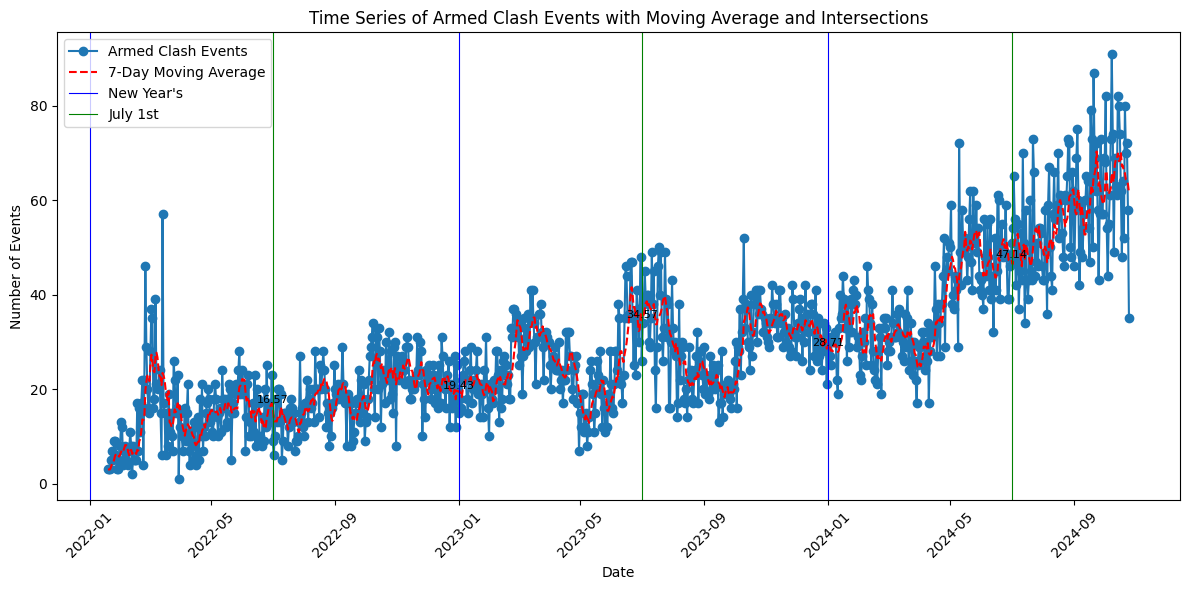

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/russia_ukraine_conflict_data.csv'
data = pd.read_csv(file_path)

# Convert 'event_date' to datetime format and filter data for sub_event_type == 'Armed clash'
data['event_date'] = pd.to_datetime(data['event_date'])
armed_clash_data = data[data['sub_event_type'] == 'Armed clash']

# Count the occurrences of 'Armed clash' events by date
armed_clash_timeseries = armed_clash_data.groupby('event_date').size()

# Calculate a moving average with a window size of 7 days (one week)
moving_average = armed_clash_timeseries.rolling(window=7, min_periods=1).mean()

# Define New Year's and July 1st markers for each year in the data range
years = armed_clash_timeseries.index.year.unique()
new_years = [pd.Timestamp(year=year, month=1, day=1) for year in years]
july_1st = [pd.Timestamp(year=year, month=7, day=1) for year in years]

# Plotting the time series with the moving average line and vertical lines for New Year's and July 1st
plt.figure(figsize=(12, 6))
plt.plot(armed_clash_timeseries.index, armed_clash_timeseries.values, marker='o', linestyle='-', label='Armed Clash Events')
plt.plot(armed_clash_timeseries.index, moving_average, color='red', linestyle='--', label='7-Day Moving Average')

# Adding vertical lines and marking intersections
for date in new_years + july_1st:
    plt.axvline(date, color='blue' if date.month == 1 else 'green', linestyle='-', linewidth=0.8,
                label="New Year's" if date.month == 1 and date == new_years[0] else ('July 1st' if date.month == 7 and date == july_1st[0] else ""))
    # Get the intersection value at each date
    if date in moving_average.index:
        intersection_value = moving_average.loc[date]
        # Annotate the plot with the intersection value
        plt.annotate(f'{intersection_value:.2f}', xy=(date, intersection_value), xytext=(date, intersection_value + 0.5),
                     ha='center', color='black', fontsize=8)

# Additional plot settings
plt.title('Time Series of Armed Clash Events with Moving Average and Intersections')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

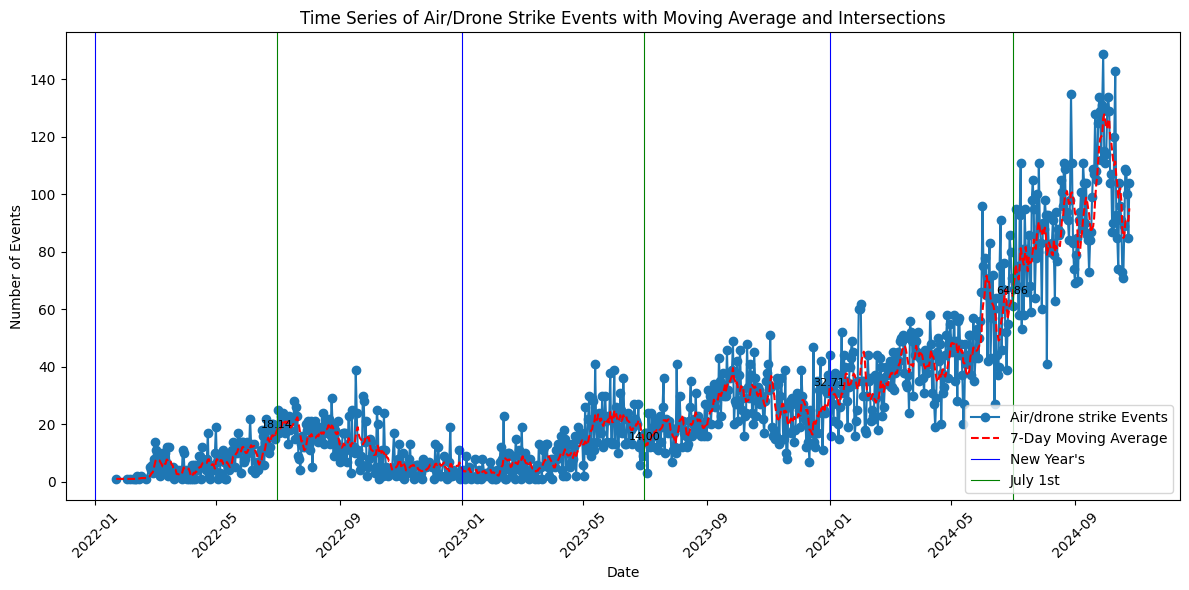

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/russia_ukraine_conflict_data.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Convert 'event_date' to datetime format and filter data for sub_event_type == 'Air/drone strike'
data['event_date'] = pd.to_datetime(data['event_date'])
air_drone_strike_data = data[data['sub_event_type'] == 'Air/drone strike']

# Count the occurrences of 'Air/drone strike' events by date
air_drone_strike_timeseries = air_drone_strike_data.groupby('event_date').size()

# Calculate a moving average with a window size of 7 days (one week)
moving_average = air_drone_strike_timeseries.rolling(window=7, min_periods=1).mean()

# Define New Year's and July 1st markers for each year in the data range
years = air_drone_strike_timeseries.index.year.unique()
new_years = [pd.Timestamp(year=year, month=1, day=1) for year in years]
july_1st = [pd.Timestamp(year=year, month=7, day=1) for year in years]

# Plotting the time series with the moving average line and vertical lines for New Year's and July 1st
plt.figure(figsize=(12, 6))
plt.plot(air_drone_strike_timeseries.index, air_drone_strike_timeseries.values, marker='o', linestyle='-', label='Air/drone strike Events')
plt.plot(air_drone_strike_timeseries.index, moving_average, color='red', linestyle='--', label='7-Day Moving Average')

# Adding vertical lines and marking intersections
for date in new_years + july_1st:
    plt.axvline(date, color='blue' if date.month == 1 else 'green', linestyle='-', linewidth=0.8,
                label="New Year's" if date.month == 1 and date == new_years[0] else ('July 1st' if date.month == 7 and date == july_1st[0] else ""))
    # Get the intersection value at each date
    if date in moving_average.index:
        intersection_value = moving_average.loc[date]
        # Annotate the plot with the intersection value
        plt.annotate(f'{intersection_value:.2f}', xy=(date, intersection_value), xytext=(date, intersection_value + 0.5),
                     ha='center', color='black', fontsize=8)

# Additional plot settings
plt.title('Time Series of Air/Drone Strike Events with Moving Average and Intersections')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

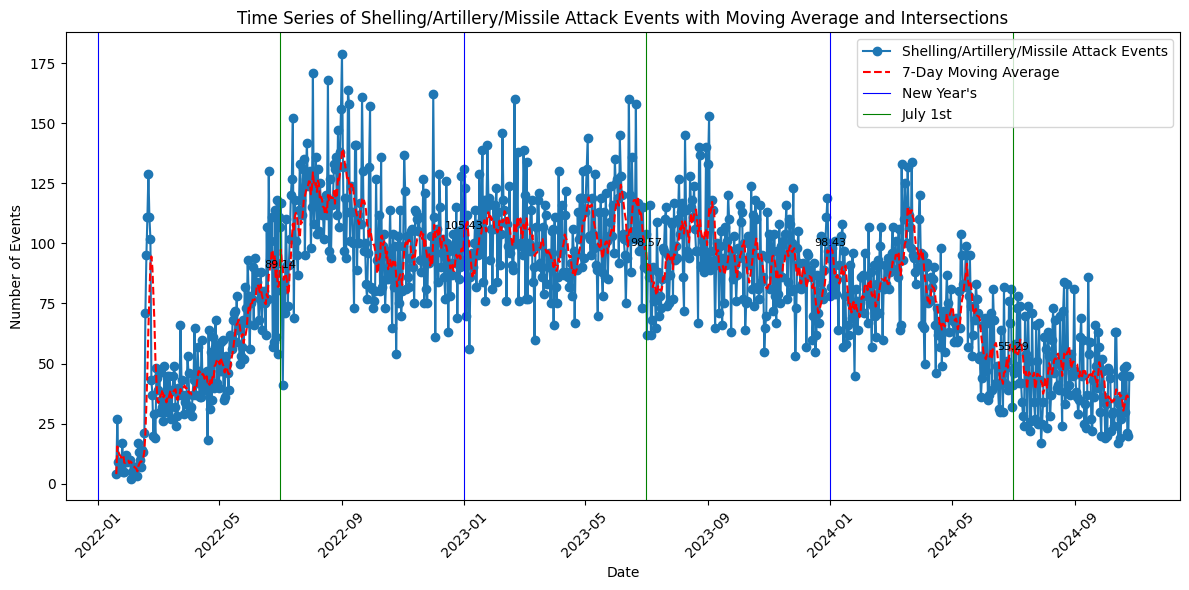

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/russia_ukraine_conflict_data.csv'  # Update with the correct file path
data = pd.read_csv(file_path)

# Convert 'event_date' to datetime format and filter data for sub_event_type == 'Shelling/artillery/missile attack'
data['event_date'] = pd.to_datetime(data['event_date'])
shelling_data = data[data['sub_event_type'] == 'Shelling/artillery/missile attack']

# Count the occurrences of 'Shelling/artillery/missile attack' events by date
shelling_timeseries = shelling_data.groupby('event_date').size()

# Calculate a moving average with a window size of 7 days (one week)
moving_average = shelling_timeseries.rolling(window=7, min_periods=1).mean()

# Define New Year's and July 1st markers for each year in the data range
years = shelling_timeseries.index.year.unique()
new_years = [pd.Timestamp(year=year, month=1, day=1) for year in years]
july_1st = [pd.Timestamp(year=year, month=7, day=1) for year in years]

# Plotting the time series with the moving average line and vertical lines for New Year's and July 1st
plt.figure(figsize=(12, 6))
plt.plot(shelling_timeseries.index, shelling_timeseries.values, marker='o', linestyle='-', label='Shelling/Artillery/Missile Attack Events')
plt.plot(shelling_timeseries.index, moving_average, color='red', linestyle='--', label='7-Day Moving Average')

# Adding vertical lines and marking intersections
for date in new_years + july_1st:
    plt.axvline(date, color='blue' if date.month == 1 else 'green', linestyle='-', linewidth=0.8,
                label="New Year's" if date.month == 1 and date == new_years[0] else ('July 1st' if date.month == 7 and date == july_1st[0] else ""))
    # Get the intersection value at each date
    if date in moving_average.index:
        intersection_value = moving_average.loc[date]
        # Annotate the plot with the intersection value
        plt.annotate(f'{intersection_value:.2f}', xy=(date, intersection_value), xytext=(date, intersection_value + 0.5),
                     ha='center', color='black', fontsize=8)

# Additional plot settings
plt.title('Time Series of Shelling/Artillery/Missile Attack Events with Moving Average and Intersections')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

## Histograms

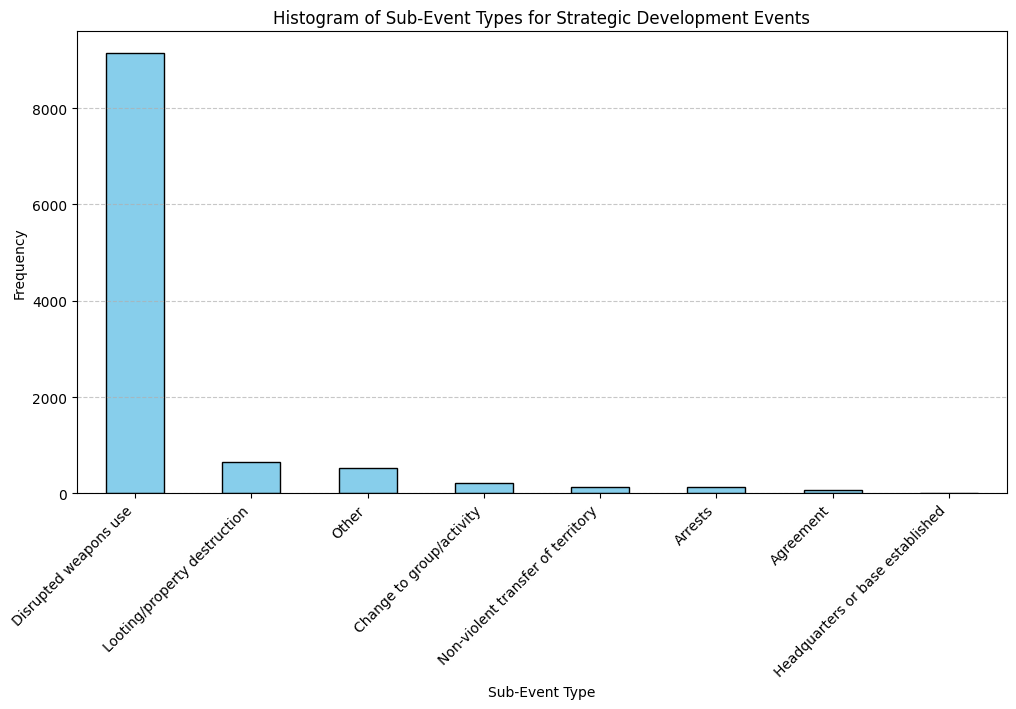

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Filter the DataFrame for 'Strategic development' events in the 'event_type' column
strategic_development_df = df[df['event_type'] == 'Strategic developments']

# Check if there are any strategic development events in the data
if not strategic_development_df.empty:
    # Plot a histogram of sub_event_types for 'Strategic development' events
    plt.figure(figsize=(12, 6))
    strategic_development_df['sub_event_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Histogram of Sub-Event Types for Strategic Development Events')
    plt.xlabel('Sub-Event Type')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("No 'Strategic development' events found in the dataset.")

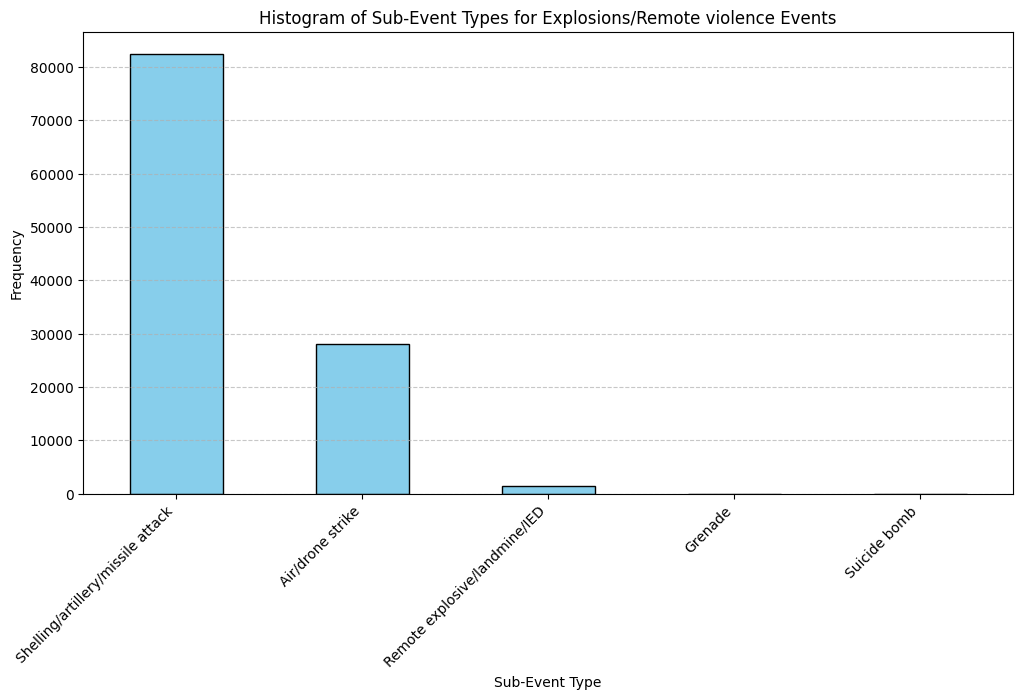

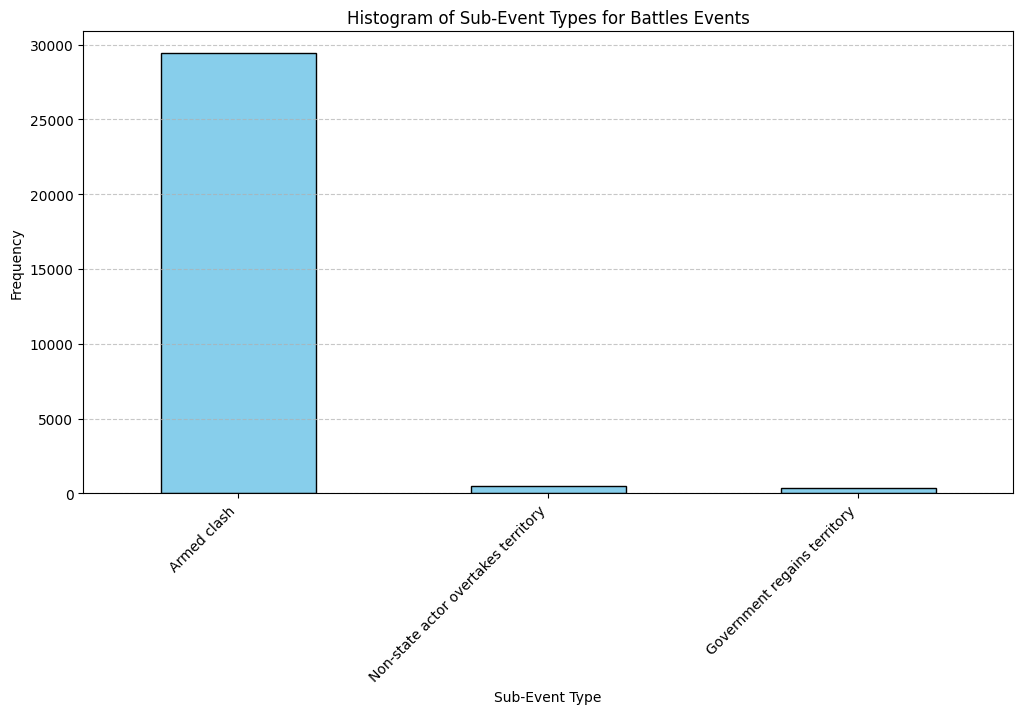

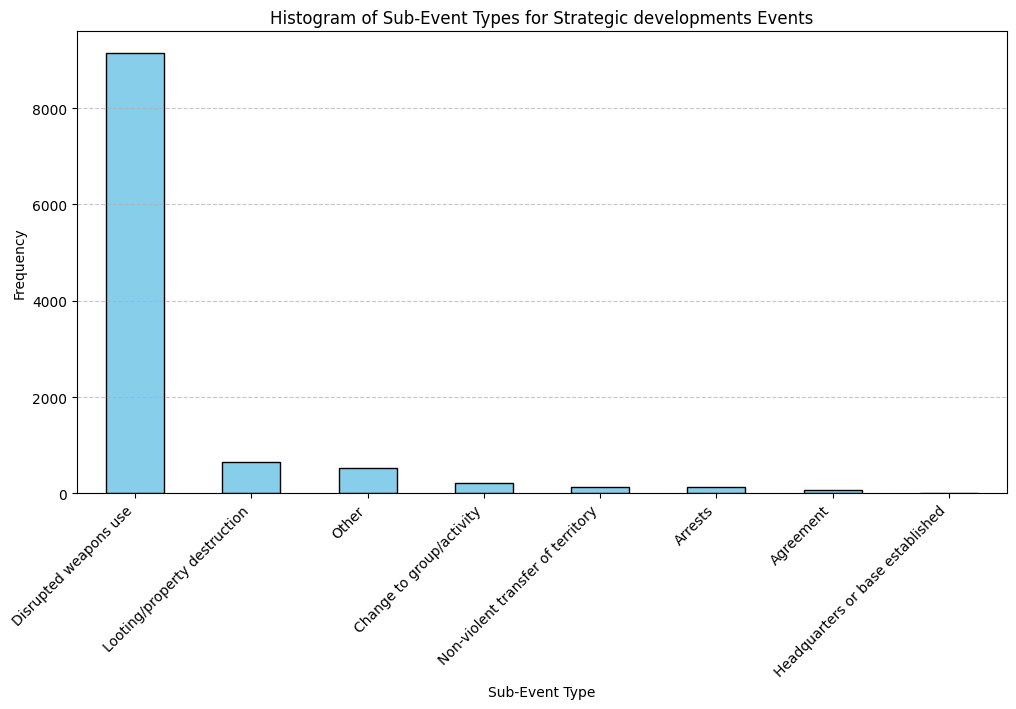

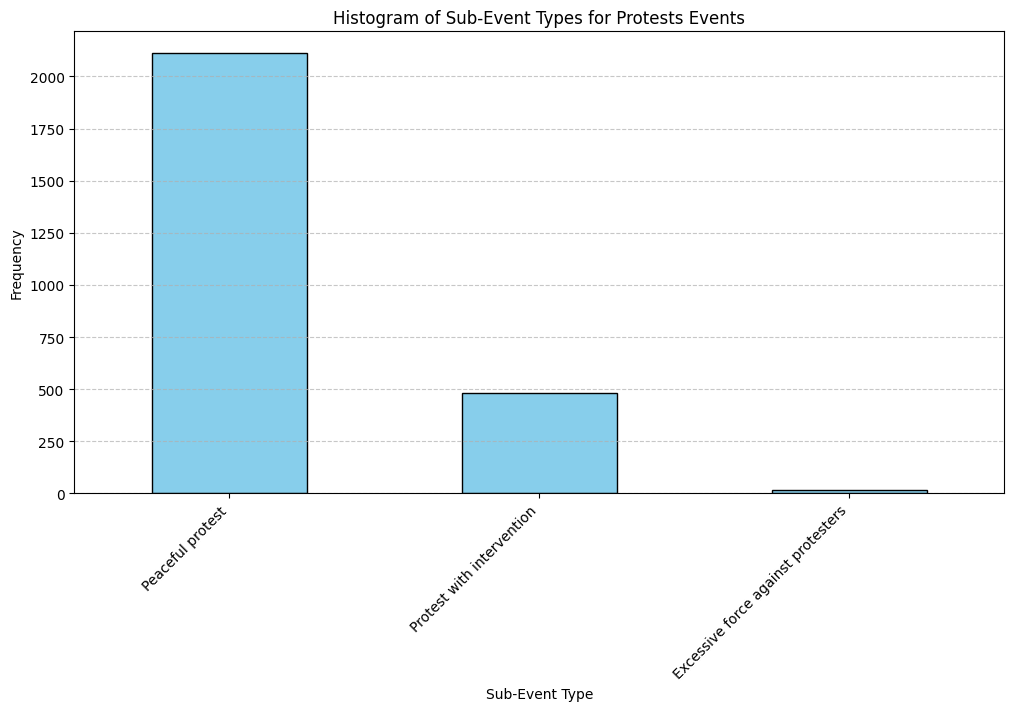

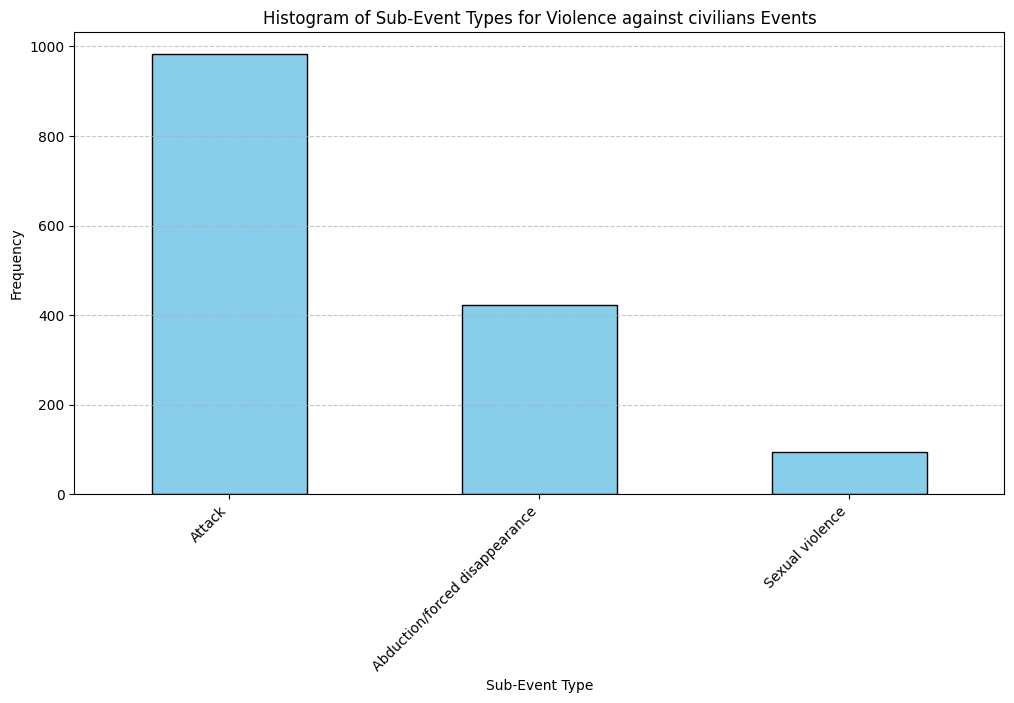

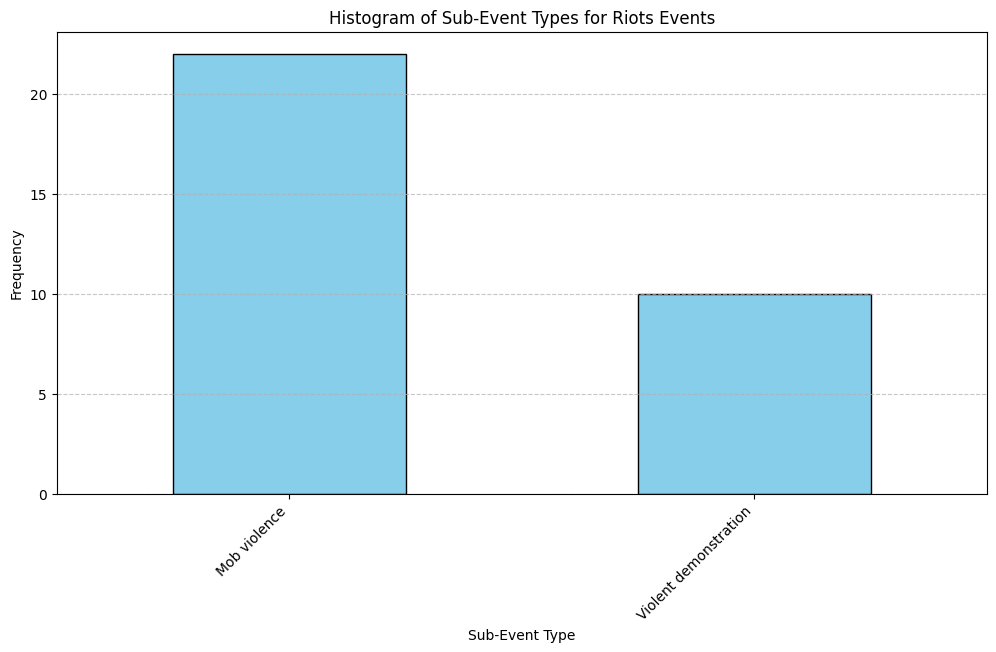

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Get unique event types
event_types = df['event_type'].unique()

# Generate a histogram for sub-event types within each event type
for event_type in event_types:
    # Filter the DataFrame for each event type
    event_df = df[df['event_type'] == event_type]

    # Check if there are any sub-event types to plot
    if not event_df.empty and 'sub_event_type' in event_df.columns:
        # Plot a histogram of sub_event_types for the current event type
        plt.figure(figsize=(12, 6))
        event_df['sub_event_type'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Histogram of Sub-Event Types for {event_type} Events')
        plt.xlabel('Sub-Event Type')
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print(f"No sub-event types found for {event_type}.")

##Network Graphs

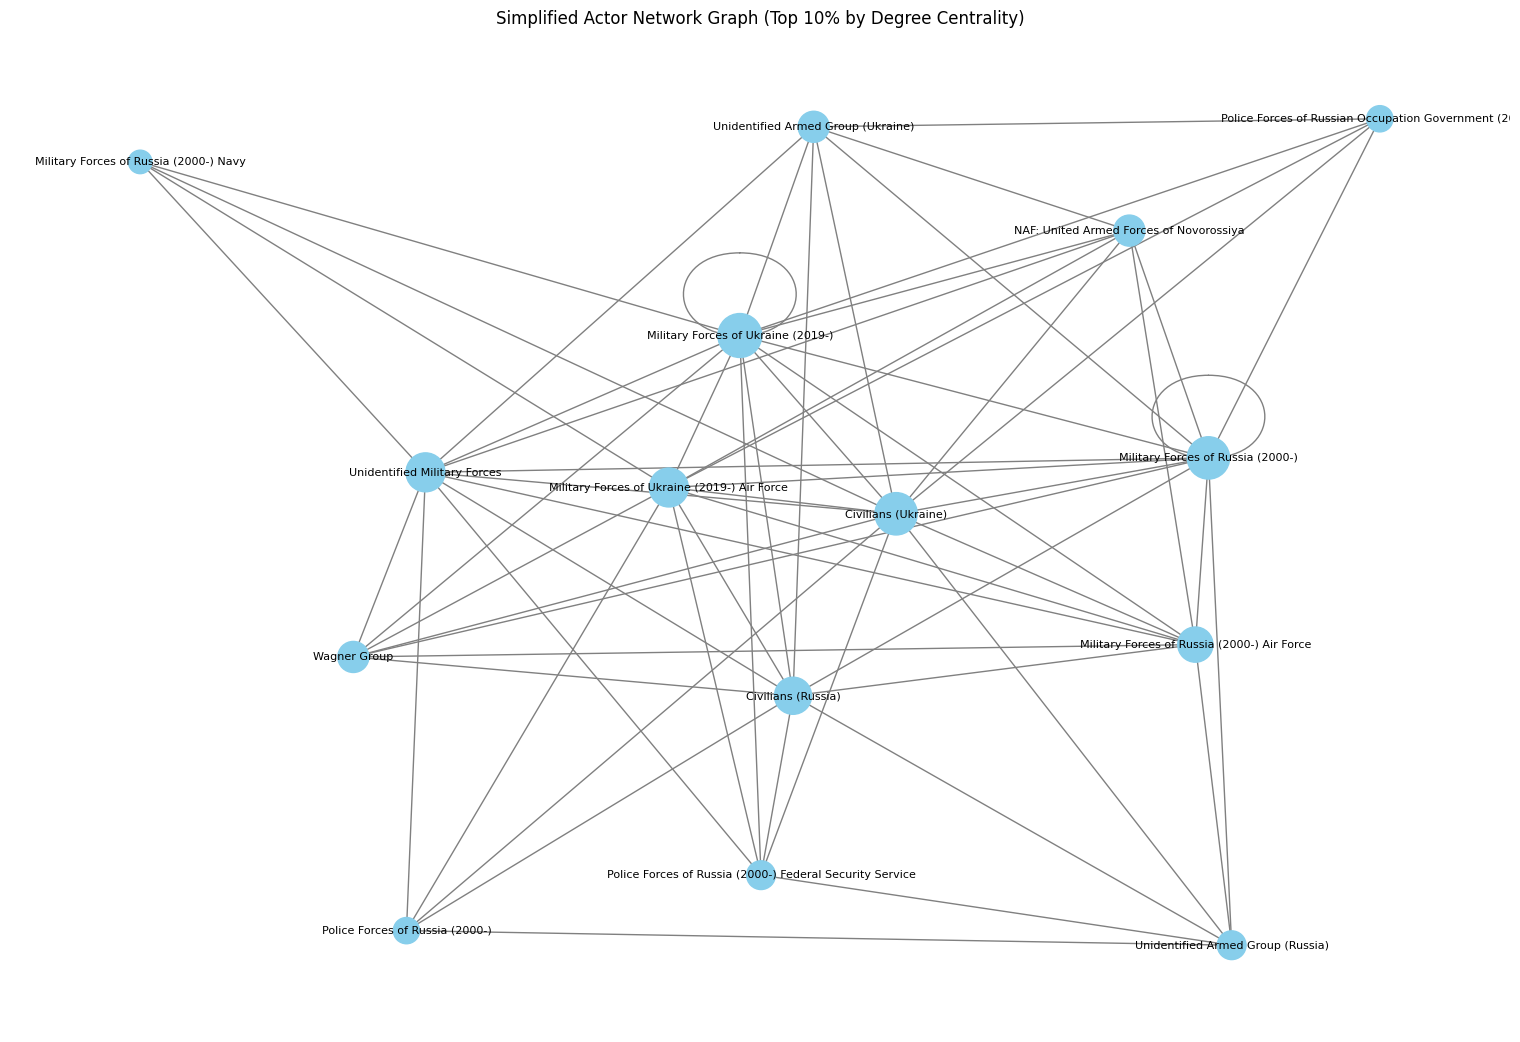

In [ ]:
# Load data and extract actor relationships
edges = df[['actor1', 'actor2']].dropna()

# Create a graph using NetworkX
G = nx.Graph()
for _, row in edges.iterrows():
    G.add_edge(row['actor1'], row['actor2'])

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Filter nodes with top 10% highest degree centrality
threshold = sorted(degree_centrality.values(), reverse=True)[int(0.1 * len(degree_centrality))]
important_nodes = [node for node, centrality in degree_centrality.items() if centrality >= threshold]
G_filtered = G.subgraph(important_nodes)

# Plot the filtered graph
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_filtered, k=0.5, iterations=50)

# Calculate degree centrality for the filtered graph
# This ensures the node_size list has the correct length
degree_centrality_filtered = nx.degree_centrality(G_filtered)

# Draw the graph with larger nodes for high-degree nodes
nx.draw(
    G_filtered, pos, with_labels=True,
    node_size=[v * 1000 for v in degree_centrality_filtered.values()], # Use filtered degree centrality
    font_size=8, node_color='skyblue', edge_color='gray', font_color='black'
)

# Show the plot
plt.title("Simplified Actor Network Graph (Top 10% by Degree Centrality)")
plt.show()

This simplified actor network graph highlights key players in the Russia-Ukraine conflict, focusing on actors with the most connections. Prominent nodes, such as the Wagner Group, Unidentified Armed Groups (Russia and Ukraine), and military forces from both countries, reflect their central roles and frequent involvement across multiple events. The inclusion of civilians indicates their significant presence in various incidents, likely as participants or affected parties. The network shows a dense web of relationships, emphasizing the complex interactions between state, paramilitary, and non-state actors throughout the conflict.

## Heatmaps

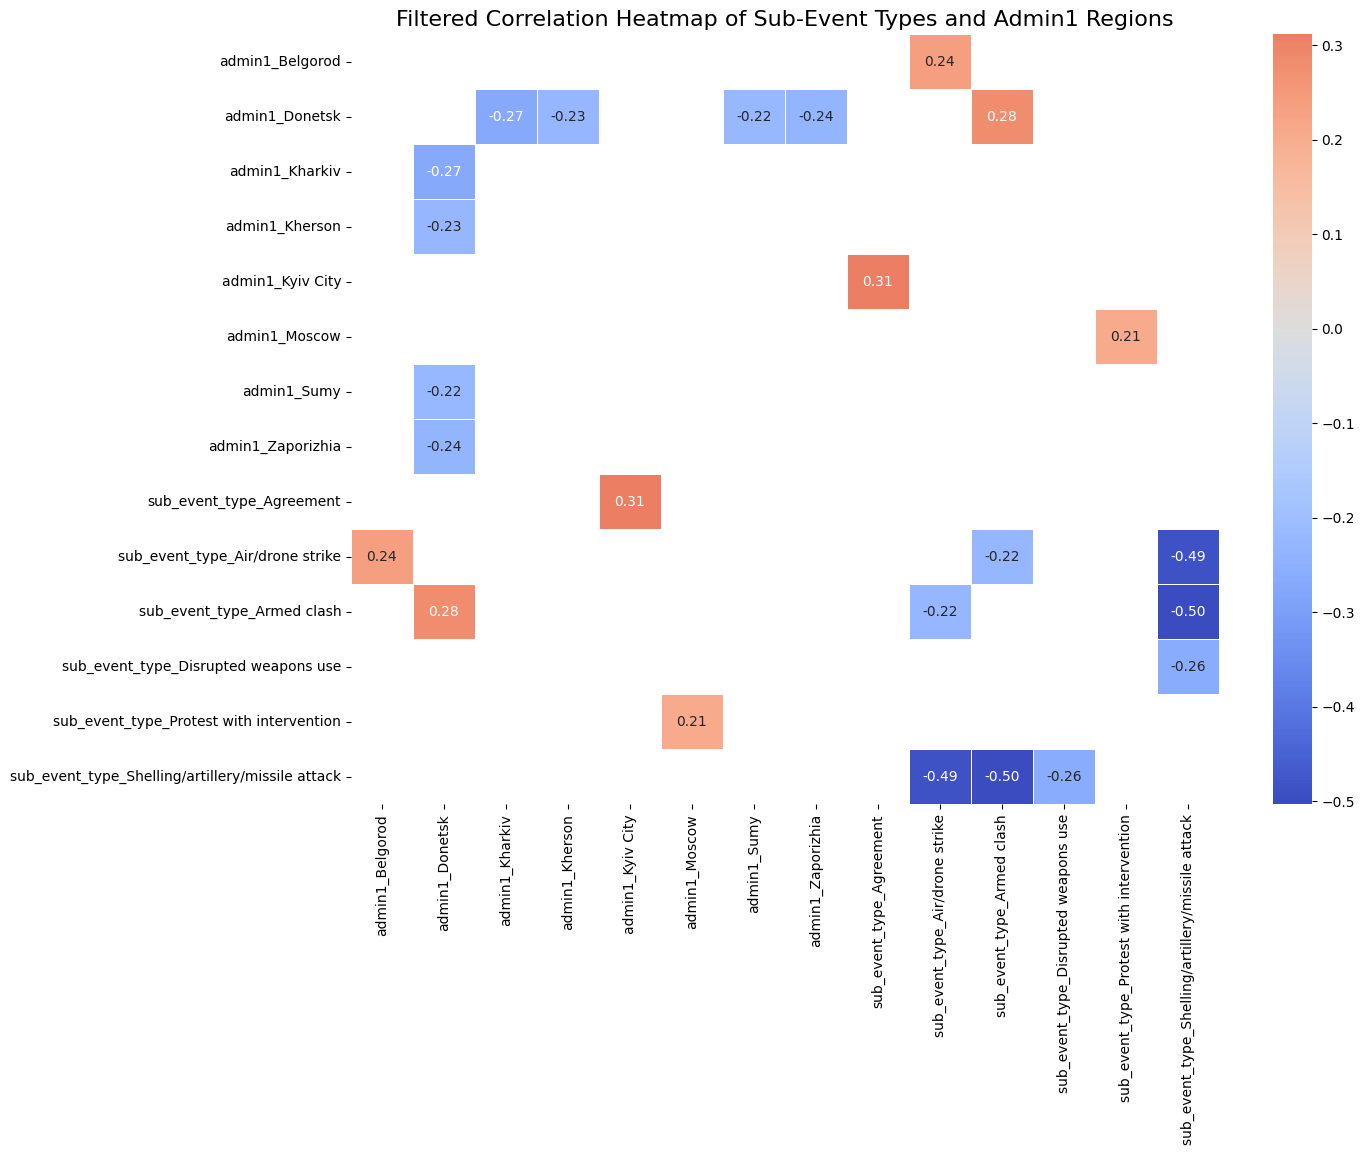

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"
df = pd.read_csv(file_path)

# Drop rows with missing values in `admin1` or `sub_event_type`
df = df.dropna(subset=['admin1', 'sub_event_type'])

# One-hot encode `admin1` and `sub_event_type`
encoded_df = pd.get_dummies(df[['admin1', 'sub_event_type']], prefix=['admin1', 'sub_event_type'])

# Calculate the correlation matrix
correlation_matrix = encoded_df.corr()

# Filter correlations above a threshold (e.g., absolute value > 0.4)
threshold = 0.2
high_corr_matrix = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1.0)]

# Drop rows and columns that are completely NaN (no high correlations)
high_corr_matrix = high_corr_matrix.dropna(how='all').dropna(axis=1, how='all')

# Plot the filtered correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(high_corr_matrix, cmap="coolwarm", center=0, annot=True, fmt=".2f", linewidths=0.5)

# Customize the plot
plt.title("Filtered Correlation Heatmap of Sub-Event Types and Admin1 Regions", fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

## Front lines reporting

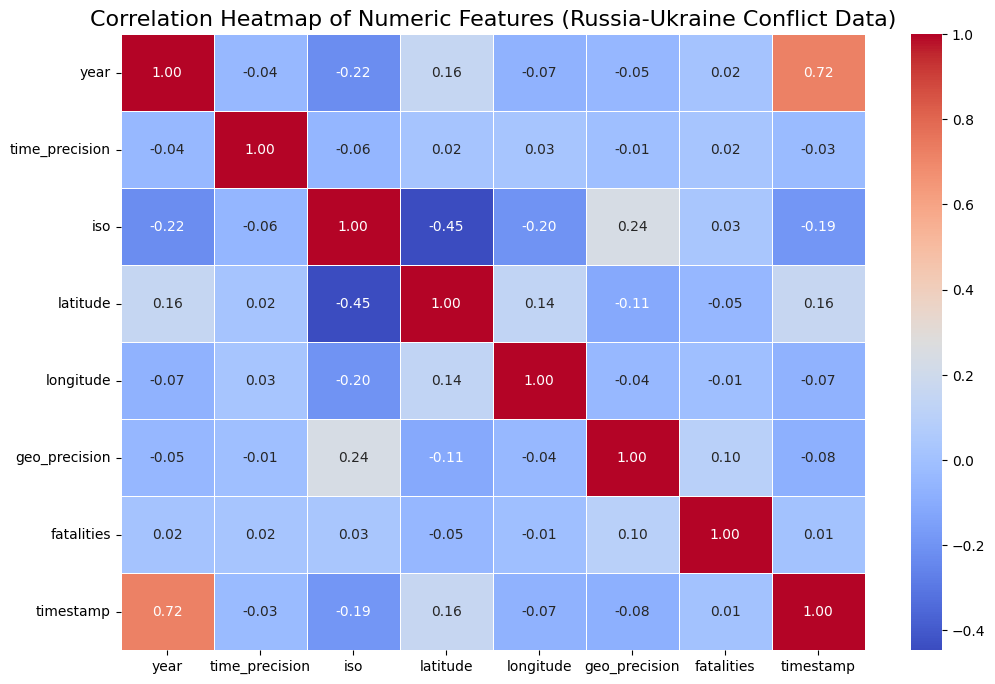

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Correct the file path if needed
df = pd.read_csv("/content/russia_ukraine_conflict_data.csv")

# Select numeric columns for correlation analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Ensure there are numeric columns to analyze
if not numeric_cols.empty:
    # Compute the correlation matrix
    corr_matrix = numeric_cols.corr()

    # Plot the correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title('Correlation Heatmap of Numeric Features (Russia-Ukraine Conflict Data)', fontsize=16)
    plt.show()
else:
    print("No numeric columns found in the dataset.")

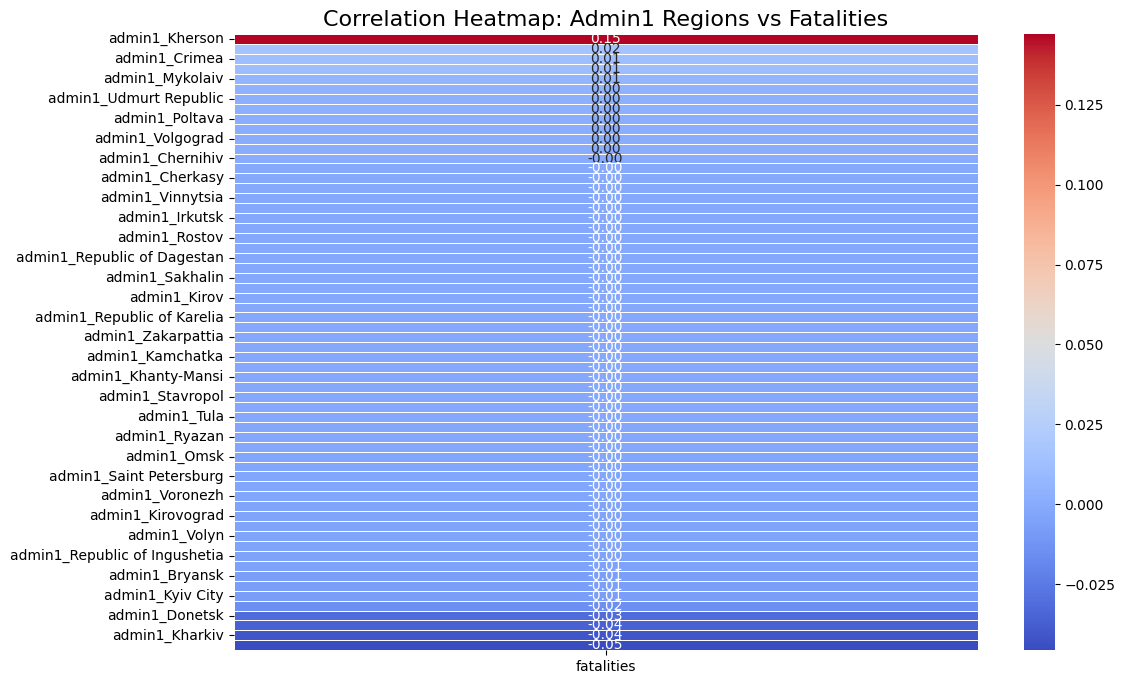

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'fatalities' is numeric
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)

# Drop regions with no fatalities
df = df[df['fatalities'] > 0].dropna(subset=['admin1'])

# One-hot encode the 'admin1' regions
admin1_encoded = pd.get_dummies(df['admin1'], prefix='admin1')

# Concatenate the encoded regions with fatalities data
heatmap_data = pd.concat([admin1_encoded, df[['fatalities']]], axis=1)

# Calculate the correlation matrix
corr_matrix = heatmap_data.corr()

# Extract the correlations of fatalities with the admin1 regions
fatalities_corr = corr_matrix[['fatalities']].drop('fatalities').sort_values(by='fatalities', ascending=False)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(fatalities_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap: Admin1 Regions vs Fatalities', fontsize=16)
plt.show()

## GeoPandas

In [ ]:
!pip install geopandas
!pip install rtree
!apt-get install -y libspatialindex-dev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 543.2/543.2 kB 9.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 1s (260 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 123623 files and directories currentl

#### Load Map data

In [ ]:
import geopandas as gpd

# Load the shapefile using the correct path
ukraine_map = gpd.read_file("/content/ne_110m_admin_0_countries.shp")

# Check the first few rows to verify the data
print(ukraine_map.head())

# Check the available columns to ensure the correct region names
print(ukraine_map.columns)
# Filter the GeoDataFrame to only include Ukraine
ukraine_map = ukraine_map[ukraine_map['NAME'] == 'Ukraine']

# Verify the filtered result
print(ukraine_map)

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

#### Event type map

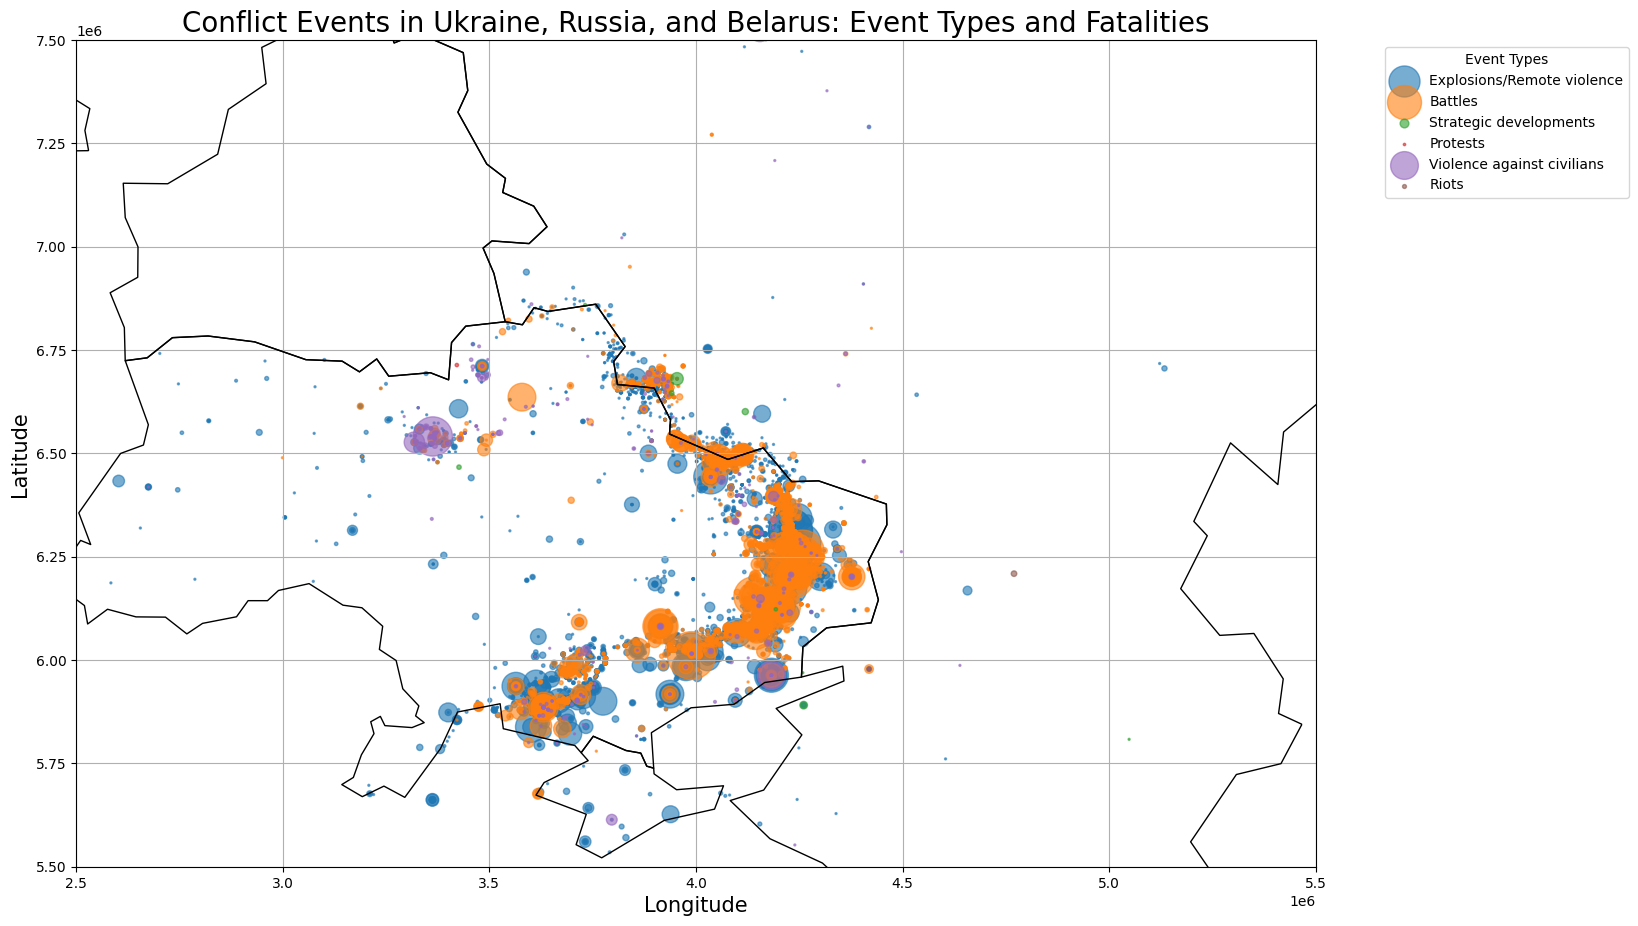

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the uploaded Natural Earth shapefile (with global country boundaries)
world_map = gpd.read_file("/content/ne_110m_admin_0_countries.shp")

# Filter for Ukraine, Russia, and Belarus
selected_countries = world_map[world_map['NAME'].isin(['Ukraine', 'Russia', 'Belarus'])]

# Load the conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"
df = pd.read_csv(file_path)

# Ensure 'fatalities' is numeric and drop rows with missing data
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)
df = df.dropna(subset=['latitude', 'longitude', 'event_type'])

# Convert conflict data to a GeoDataFrame with points from lat/lon
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84 CRS

# Reproject both datasets to Web Mercator (EPSG:3857) for better plotting
gdf = gdf.to_crs(epsg=3857)
selected_countries = selected_countries.to_crs(epsg=3857)

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(16, 12))  # Make the plot bigger

# Plot country boundaries
selected_countries.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot conflict events with colors for event types and sizes based on fatalities
event_types = df['event_type'].unique()
for event_type in event_types:
    subset = gdf[gdf['event_type'] == event_type]
    subset.plot(
        ax=ax, markersize=subset['fatalities'] * 2, alpha=0.6,
        label=event_type
    )

# Customize the plot
plt.title('Conflict Events in Ukraine, Russia, and Belarus: Event Types and Fatalities', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.legend(title='Event Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Zoom in on the region of interest (adjusting x and y limits for better focus)
ax.set_xlim([2.5e6, 5.5e6])  # Adjust to zoom into Eastern Europe
ax.set_ylim([5.5e6, 7.5e6])  # Adjust as needed to fit the area

# Show the plot
plt.show()

### Conflict Sub_event map

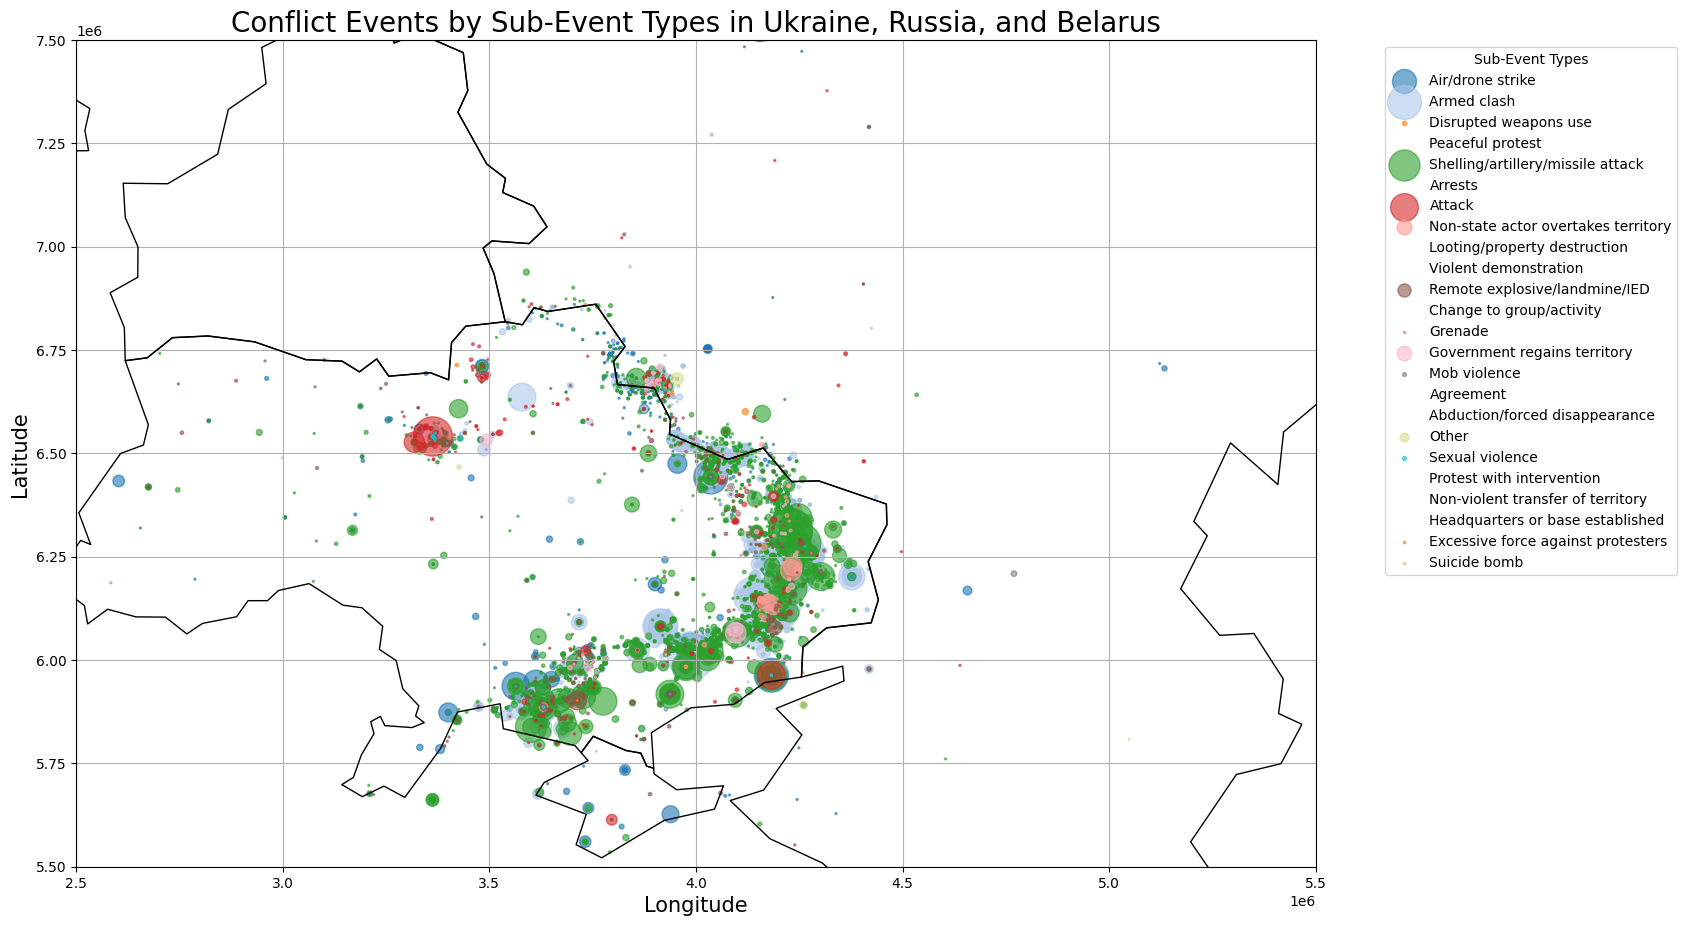

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the uploaded Natural Earth shapefile (with global country boundaries)
world_map = gpd.read_file("/content/ne_110m_admin_0_countries.shp")

# Filter for Ukraine, Russia, and Belarus
selected_countries = world_map[world_map['NAME'].isin(['Ukraine', 'Russia', 'Belarus'])]

# Load the conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"
df = pd.read_csv(file_path)

# Ensure 'fatalities' is numeric and handle missing values
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)
df = df.dropna(subset=['latitude', 'longitude', 'sub_event_type'])

# Convert the conflict DataFrame to a GeoDataFrame with points from latitude and longitude
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84 CRS

# Reproject both datasets to the same CRS (Web Mercator)
gdf = gdf.to_crs(epsg=3857)
selected_countries = selected_countries.to_crs(epsg=3857)

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Plot the country boundaries
selected_countries.boundary.plot(ax=ax, linewidth=1, color='black')

# Loop through each sub-event type and plot them with different colors
sub_event_types = gdf['sub_event_type'].unique()
colors = plt.cm.tab20.colors  # Get a set of colors to use

for i, sub_event_type in enumerate(sub_event_types):
    subset = gdf[gdf['sub_event_type'] == sub_event_type]
    subset.plot(
        ax=ax, markersize=subset['fatalities'] * 2, color=colors[i % len(colors)],
        alpha=0.6, label=sub_event_type
    )

# Customize the plot
plt.title('Conflict Events by Sub-Event Types in Ukraine, Russia, and Belarus', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.legend(title='Sub-Event Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Zoom in on the region of interest (adjusting x and y limits for better focus)
ax.set_xlim([2.5e6, 5.5e6])  # Adjust to zoom into Eastern Europe
ax.set_ylim([5.5e6, 7.5e6])  # Adjust as needed to fit the area

# Show the plot
plt.show()

## Interactive conflict map

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Load Natural Earth shapefile for country boundaries
world_map = gpd.read_file("/content/ne_110m_admin_0_countries.shp")
selected_countries = world_map[world_map['NAME'].isin(['Ukraine', 'Russia', 'Belarus'])]

# Load conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"
df = pd.read_csv(file_path)

# Ensure fatalities are numeric, and filter out rows with missing data
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)
df = df.dropna(subset=['latitude', 'longitude', 'event_type', 'actor1', 'notes'])

# Filter data within Eastern Europe boundaries
eastern_europe_bounds = {
    'min_lat': 40.0,  # Minimum latitude
    'max_lat': 60.0,  # Maximum latitude
    'min_lon': 20.0,  # Minimum longitude
    'max_lon': 60.0   # Maximum longitude
}
df = df[(df['latitude'] >= eastern_europe_bounds['min_lat']) &
        (df['latitude'] <= eastern_europe_bounds['max_lat']) &
        (df['longitude'] >= eastern_europe_bounds['min_lon']) &
        (df['longitude'] <= eastern_europe_bounds['max_lon'])]

# Convert to GeoDataFrame
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Initialize a folium map centered on Eastern Europe with OpenStreetMap
m = folium.Map(location=[48.3794, 31.1656], zoom_start=5, tiles="OpenStreetMap")

# Add boundaries for selected countries as a GeoJson overlay
for _, country in selected_countries.iterrows():
    folium.GeoJson(
        country['geometry'],
        name="Country Boundaries",
        style_function=lambda x: {'color': 'black', 'weight': 1}
    ).add_to(m)

# Define a color palette for event types
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'darkgreen', 'lightgray']
color_map = {event_type: colors[i % len(colors)] for i, event_type in enumerate(df['event_type'].unique())}

# Plot each event type with a different marker cluster and color
event_types = df['event_type'].unique()
for event_type in event_types:
    # Create a FeatureGroup for each event type
    event_group = folium.FeatureGroup(name=event_type).add_to(m)

    # Filter data for the current event type
    subset = gdf[gdf['event_type'] == event_type]

    # Add each event as a CircleMarker with custom popup and tooltip
    for _, row in subset.iterrows():
        popup_text = (f"Fatalities: {row['fatalities']}<br>"
                      f"Type: {row['event_type']}<br>"
                      f"Actor: {row['actor1']}<br>"
                      f"Notes: {row['notes']}")

        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=max(row['fatalities'] * 0.1, 2),  # Scale by fatalities with a minimum size
            color=color_map[event_type],  # Unique color for each event type
            fill=True,
            fill_color=color_map[event_type],
            fill_opacity=0.6,
            popup=folium.Popup(popup_text, max_width=300),
            tooltip=f"Actor: {row['actor1']}"  # Tooltip shows actor
        ).add_to(event_group)

# Add LayerControl to toggle between event types and base maps
folium.LayerControl(collapsed=False).add_to(m)

# Display the map
m
# Save the map to an HTML file
m.save("/content/conflict_events_map_ee.html")

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from matplotlib import cm, colors

# Load Natural Earth shapefile for country boundaries
world_map = gpd.read_file("/content/ne_110m_admin_0_countries.shp")
selected_countries = world_map[world_map['NAME'].isin(['Ukraine', 'Russia', 'Belarus'])]

# Load conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"
df = pd.read_csv(file_path)

# Ensure fatalities are numeric, and filter out rows with missing data
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)
df = df.dropna(subset=['latitude', 'longitude', 'sub_event_type', 'actor1', 'notes'])

# Filter data within Eastern Europe boundaries
eastern_europe_bounds = {
    'min_lat': 40.0,  # Minimum latitude
    'max_lat': 60.0,  # Maximum latitude
    'min_lon': 20.0,  # Minimum longitude
    'max_lon': 60.0   # Maximum longitude
}
df = df[(df['latitude'] >= eastern_europe_bounds['min_lat']) &
        (df['latitude'] <= eastern_europe_bounds['max_lat']) &
        (df['longitude'] >= eastern_europe_bounds['min_lon']) &
        (df['longitude'] <= eastern_europe_bounds['max_lon'])]

# Convert to GeoDataFrame
geometry = gpd.points_from_xy(df['longitude'], df['latitude'])
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

# Initialize a folium map centered on Eastern Europe with OpenStreetMap
m = folium.Map(location=[48.3794, 31.1656], zoom_start=5, tiles="OpenStreetMap")

# Add boundaries for selected countries as a GeoJson overlay
for _, country in selected_countries.iterrows():
    folium.GeoJson(
        country['geometry'],
        name="Country Boundaries",
        style_function=lambda x: {'color': 'black', 'weight': 1}
    ).add_to(m)

# Define a dynamic color palette for sub_event_types
cmap = cm.get_cmap('tab20', len(df['sub_event_type'].unique()))  # Use a colormap with enough distinct colors
color_map = {sub_event_type: colors.rgb2hex(cmap(i)) for i, sub_event_type in enumerate(df['sub_event_type'].unique())}

# Plot each sub_event_type with a different marker cluster and color
sub_event_types = df['sub_event_type'].unique()
for sub_event_type in sub_event_types:
    # Create a FeatureGroup for each sub_event_type
    sub_event_group = folium.FeatureGroup(name=sub_event_type).add_to(m)

    # Filter data for the current sub_event_type
    subset = gdf[gdf['sub_event_type'] == sub_event_type]

    # Add each event as a CircleMarker with custom popup and tooltip
    for _, row in subset.iterrows():
        popup_text = (f"Fatalities: {row['fatalities']}<br>"
                      f"Sub Event Type: {row['sub_event_type']}<br>"
                      f"Actor: {row['actor1']}<br>"
                      f"Notes: {row['notes']}")

        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=max(row['fatalities'] * 0.1, 2),  # Scale by fatalities with a minimum size
            color=color_map[sub_event_type],  # Unique color for each sub_event_type
            fill=True,
            fill_color=color_map[sub_event_type],
            fill_opacity=0.6,
            popup=folium.Popup(popup_text, max_width=300),
            tooltip=f"Actor: {row['actor1']}"  # Tooltip shows actor
        ).add_to(sub_event_group)

# Add LayerControl to toggle between sub_event_types
folium.LayerControl(collapsed=False).add_to(m)

# Display the map
m
# Save the map to an HTML file
m.save("/content/conflict_events_map_sub_event_type.html")

####Sexual Violence Map

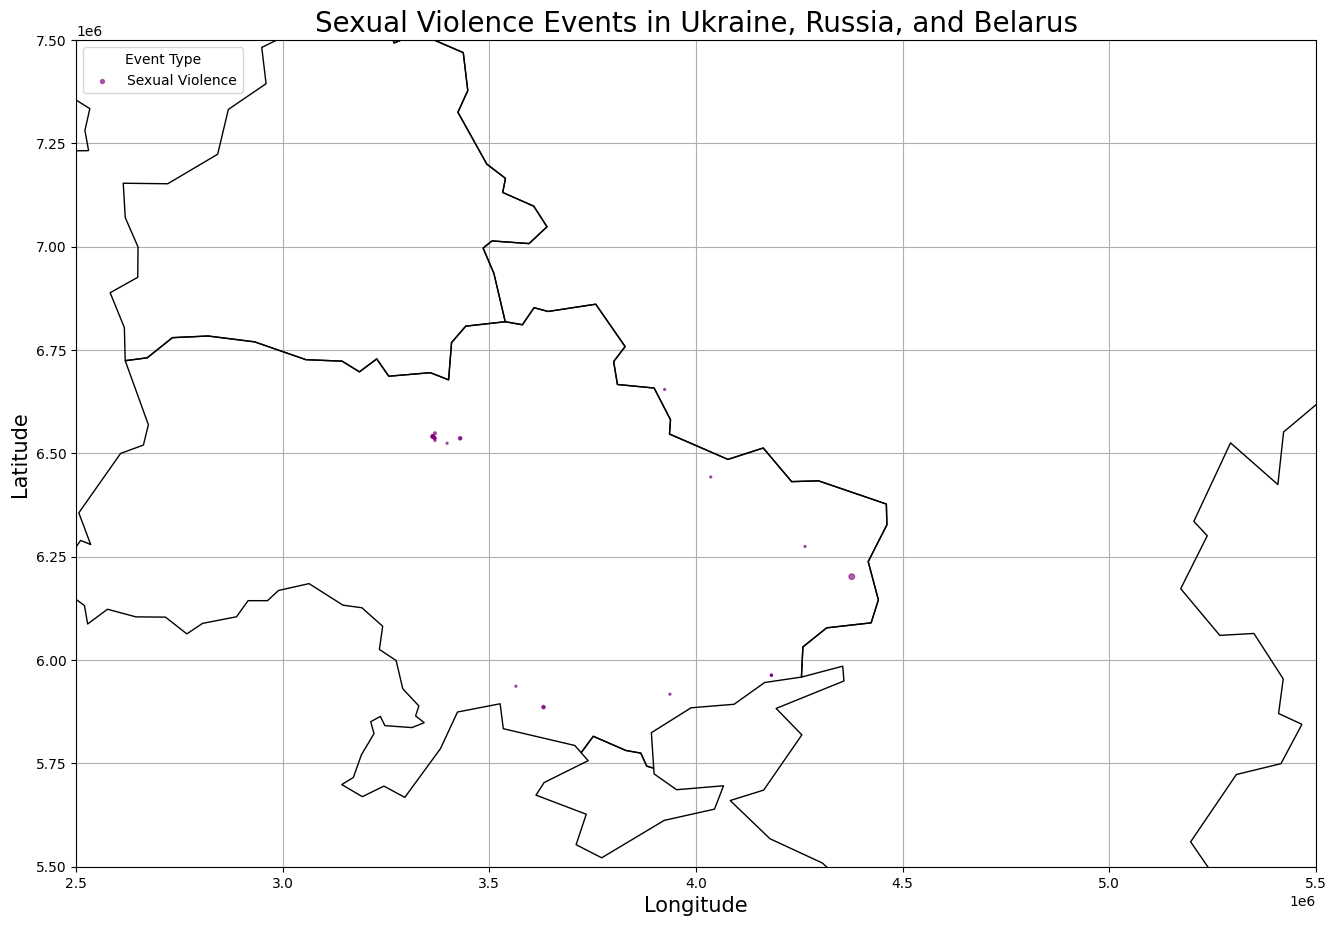

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the uploaded Natural Earth shapefile (with global country boundaries)
world_map = gpd.read_file("/content/ne_110m_admin_0_countries.shp")

# Filter for Ukraine, Russia, and Belarus
selected_countries = world_map[world_map['NAME'].isin(['Ukraine', 'Russia', 'Belarus'])]

# Load the conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"
df = pd.read_csv(file_path)

# Ensure 'fatalities' is numeric and handle missing values
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)
df = df.dropna(subset=['latitude', 'longitude', 'sub_event_type'])

# Filter for events classified as 'Sexual violence' in the 'sub_event_type' column
sexual_violence_df = df[df['sub_event_type'] == 'Sexual violence']

# Convert the filtered DataFrame to a GeoDataFrame with points from latitude and longitude
geometry = gpd.points_from_xy(sexual_violence_df['longitude'], sexual_violence_df['latitude'])
gdf = gpd.GeoDataFrame(sexual_violence_df, geometry=geometry, crs="EPSG:4326")  # WGS84 CRS

# Reproject both datasets to the same CRS (Web Mercator)
gdf = gdf.to_crs(epsg=3857)
selected_countries = selected_countries.to_crs(epsg=3857)

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(16, 12))

# Plot the country boundaries
selected_countries.boundary.plot(ax=ax, linewidth=1, color='black')

# Plot sexual violence events with dot sizes based on fatalities
gdf.plot(
    ax=ax, markersize=gdf['fatalities'] * 2, color='purple', alpha=0.6, label='Sexual Violence'
)

# Customize the plot
plt.title('Sexual Violence Events in Ukraine, Russia, and Belarus', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.legend(title='Event Type', loc='upper left')
plt.grid(True)

# Zoom in on the region of interest (adjusting x and y limits for better focus)
ax.set_xlim([2.5e6, 5.5e6])  # Adjust to zoom into Eastern Europe
ax.set_ylim([5.5e6, 7.5e6])  # Adjust as needed to fit the area

# Show the plot
plt.show()

In [ ]:
import pandas as pd
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster

# Load Natural Earth shapefile for country boundaries
world_map = gpd.read_file("/content/ne_110m_admin_0_countries.shp")
selected_countries = world_map[world_map['NAME'].isin(['Ukraine', 'Russia', 'Belarus'])]

# Load the conflict data
file_path = "/content/russia_ukraine_conflict_data.csv"
df = pd.read_csv(file_path)

# Convert fatalities to numeric and filter missing values
df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce').fillna(0)
df = df.dropna(subset=['latitude', 'longitude', 'sub_event_type', 'actor1', 'notes'])

# Filter for 'Sexual violence' events
sexual_violence_df = df[df['sub_event_type'] == 'Sexual violence']

# Convert to GeoDataFrame
geometry = gpd.points_from_xy(sexual_violence_df['longitude'], sexual_violence_df['latitude'])
gdf = gpd.GeoDataFrame(sexual_violence_df, geometry=geometry, crs="EPSG:4326")

# Initialize a folium map centered on Eastern Europe
m = folium.Map(location=[48.3794, 31.1656], zoom_start=5, tiles="cartodb positron")

# Create a marker cluster to handle many points
marker_cluster = MarkerCluster().add_to(m)

# Add markers for each event
for _, row in gdf.iterrows():
    # Customize popup to include fatalities, event type, actor, and notes
    popup_text = (f"Fatalities: {row['fatalities']}<br>"
                  f"Type: {row['sub_event_type']}<br>"
                  f"Actor: {row['actor1']}<br>"
                  f"Notes: {row['notes']}")

    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=row['fatalities'] * 0.1,  # Scale circle by fatalities
        color='purple',
        fill=True,
        fill_color='purple',
        fill_opacity=0.6,
        popup=folium.Popup(popup_text, max_width=300),  # Set max_width for readability
        tooltip=f"Actor: {row['actor1']}"  # Display actor when hovering
    ).add_to(marker_cluster)

# Display selected countries' boundaries as an overlay
for _, country in selected_countries.iterrows():
    folium.GeoJson(
        country['geometry'],
        style_function=lambda x: {'color': 'black', 'weight': 1}
    ).add_to(m)

# Show the map
m

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


# Load the data
df = pd.read_csv("/content/armenia_azerbaijan_conflict_data.csv")


#Weapons Transfers analysis

##Ukraine Transfers Over time

In [16]:
import pandas as pd

# Load your data
data = pd.read_csv('/content/ukraine_trade.csv')
data.head()

Recipient   Supplier  Year of order       Number ordered   .1  \
0   Ukraine    Germany           2022  NaN            14.0  NaN   
1   Ukraine    Germany           2022  NaN            50.0  NaN   
2   Ukraine    Czechia           2022  NaN            20.0    ?   
3   Ukraine  Lithuania           2022  NaN            18.0    ?   
4   Ukraine     Norway           2023  NaN           100.0    ?   

    Weapon designation  Weapon description  Number delivered   .2  \
0       PzH-2000 155mm  self-propelled gun                14  NaN   
1              Dingo-2                 APC                50  NaN   
2  RM-70 Vampire 122mm  self-propelled MRL                20    ?   
3        M-101A1 105mm           towed gun                18    ?   
4               IRIS-T              BVRAAM               100    ?   

  Year(s) of delivery       status  \
0                2022  Second hand   
1                2022  Second hand   
2                2022  Second hand   
3                2022  Second hand   
4                2023  Second hand   

                                            Comments  SIPRI TIV per unit  \
0  Second-hand; aid after 2022 Russian invasion o...                1.80   
1  Second-hand; aid after 2022 Russian invasion o...                0.14   
2  Second-hand; aid after 2022 Russian invasion o...                0.38   
3  Second-hand; aid after 2022 Russian invasion o...                0.18   
4  Second-hand; aid after 2022 Russian invasion o...                0.08   

   SIPRI TIV for total order  SIPRI TIV of delivered weapons  
0                      25.20                           25.20  
1                       7.00                            7.00  
2                       7.60                            7.60  
3                       3.24                            3.24  
4                       8.00                            8.00

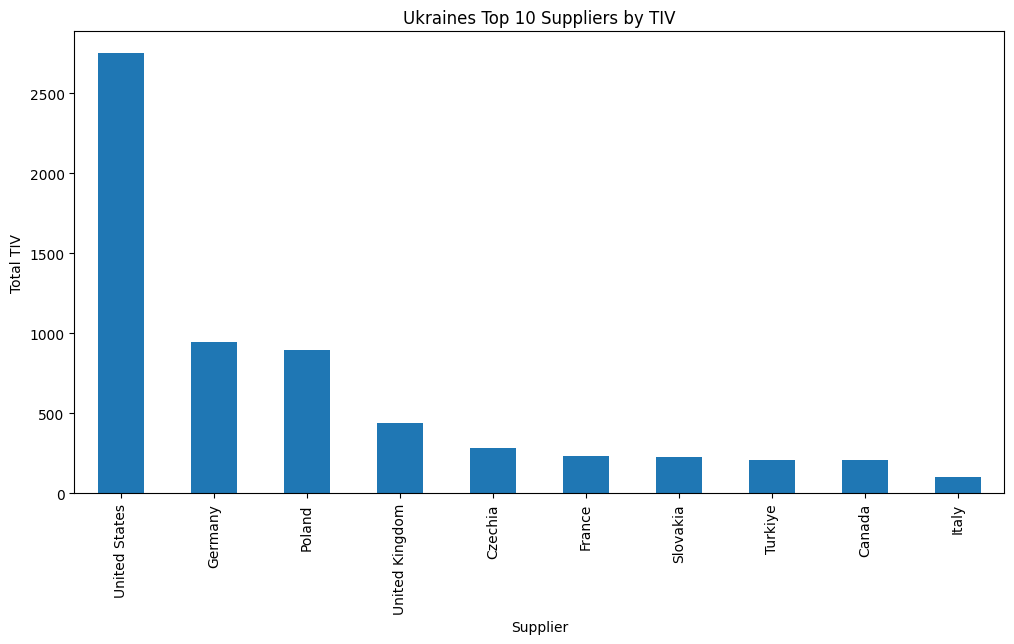

<Figure size 1400x800 with 0 Axes>

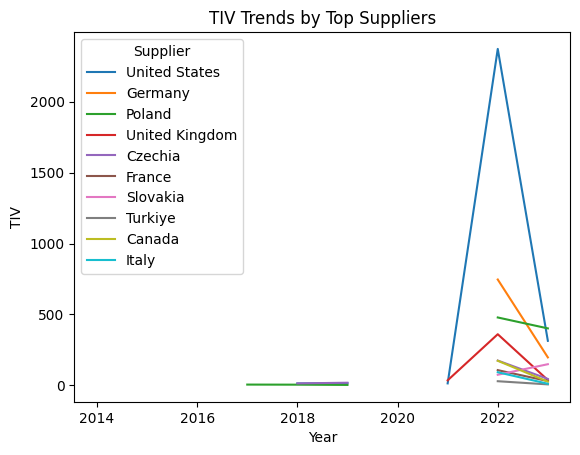

In [17]:
import matplotlib.pyplot as plt
 #Here, we use 'SIPRI TIV of delivered weapons' as TIV
data.rename(columns={'SIPRI TIV of delivered weapons': 'TIV'}, inplace=True)

# Drop rows with missing TIV or Supplier
data = data.dropna(subset=['Supplier', 'TIV'])

# Ensure TIV is numeric
data['TIV'] = pd.to_numeric(data['TIV'], errors='coerce')

# Group by supplier and sum TIV
supplier_tiv = data.groupby('Supplier')['TIV'].sum().sort_values(ascending=False)

# Select top 10 suppliers by TIV
top_suppliers = supplier_tiv.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_suppliers.plot(kind='bar', title='Ukraines Top 10 Suppliers by TIV')
plt.xlabel('Supplier')
plt.ylabel('Total TIV')
plt.show()

# Group by supplier and year for trend analysis
data.rename(columns={'Year of order': 'Year_of_Order'}, inplace=True)
tiv_trends = data.groupby(['Supplier', 'Year_of_Order'])['TIV'].sum().unstack()

# Plot trends for top 5 suppliers
plt.figure(figsize=(14, 8))
tiv_trends.loc[top_suppliers.index].T.plot(title='TIV Trends by Top Suppliers')
plt.xlabel('Year')
plt.ylabel('TIV')
plt.legend(title='Supplier')
plt.show()

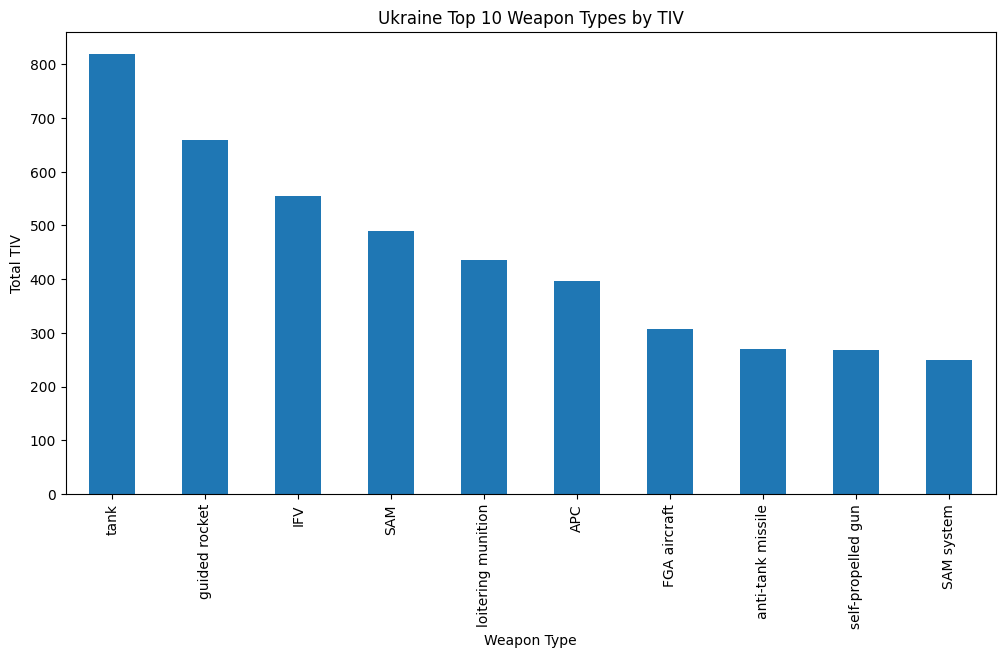

<Figure size 1400x800 with 0 Axes>

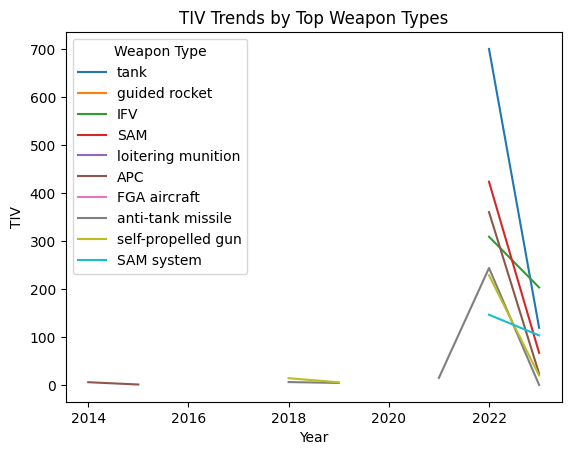

In [18]:
# Use the correct column for TIV
data.rename(columns={'SIPRI TIV of delivered weapons': 'TIV', 'Weapon description': 'Weapon_Description'}, inplace=True)

# Group by weapon type and sum TIV
weapon_type_tiv = data.groupby('Weapon_Description')['TIV'].sum().sort_values(ascending=False)

# Select top 10 weapon types by TIV
top_weapon_types = weapon_type_tiv.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_weapon_types.plot(kind='bar', title='Ukraine Top 10 Weapon Types by TIV')
plt.xlabel('Weapon Type')
plt.ylabel('Total TIV')
plt.show()

# Group by weapon type and year for trend analysis
tiv_trends_by_weapon = data.groupby(['Weapon_Description', 'Year_of_Order'])['TIV'].sum().unstack()

# Plot trends for top 5 weapon types
plt.figure(figsize=(14, 8))
tiv_trends_by_weapon.loc[top_weapon_types.index].T.plot(title='TIV Trends by Top Weapon Types')
plt.xlabel('Year')
plt.ylabel('TIV')
plt.legend(title='Weapon Type')
plt.show()

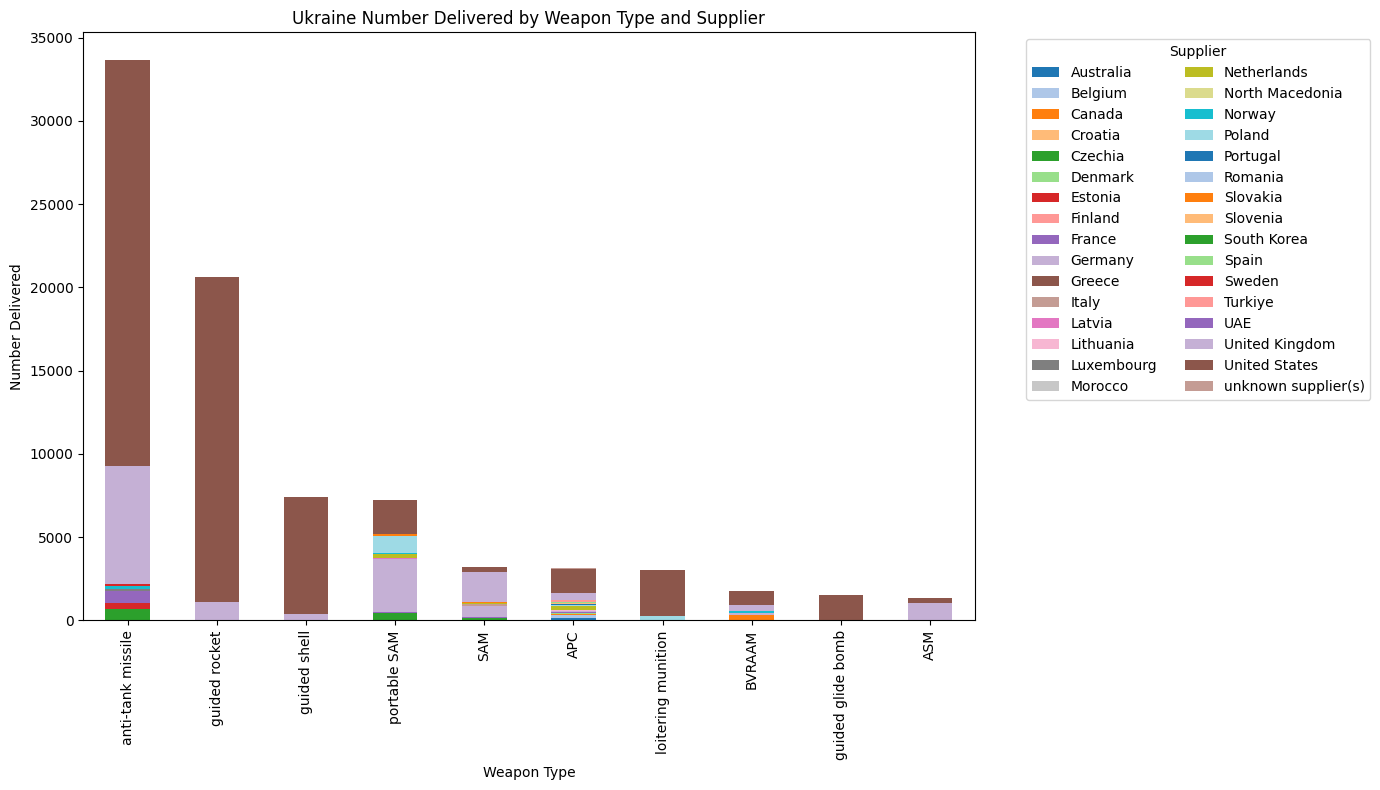

In [19]:
# Ensure column names match the dataset
data.rename(columns={'Weapon description': 'Weapon_Description', 'Number delivered': 'Number_Delivered'}, inplace=True)

# Group by weapon description and supplier to sum the number delivered
weapon_delivery = data.groupby(['Weapon_Description', 'Supplier'])['Number_Delivered'].sum().unstack(fill_value=0)

# Select top 10 weapon types by total number delivered
top_weapon_deliveries = weapon_delivery.sum(axis=1).sort_values(ascending=False).head(10)

# Filter the data for the top weapon types
filtered_weapon_delivery = weapon_delivery.loc[top_weapon_deliveries.index]

import matplotlib.pyplot as plt

import seaborn as sns

# Create a larger, diverse color palette
palette = sns.color_palette("tab20", n_colors=len(filtered_weapon_delivery.columns))

# Plot the data as a stacked bar chart with unique colors
filtered_weapon_delivery.plot(kind='bar', stacked=True, figsize=(14, 8), color=palette)
plt.title('Ukraine Number Delivered by Weapon Type and Supplier')
plt.xlabel('Weapon Type')
plt.ylabel('Number Delivered')
plt.legend(title='Supplier', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

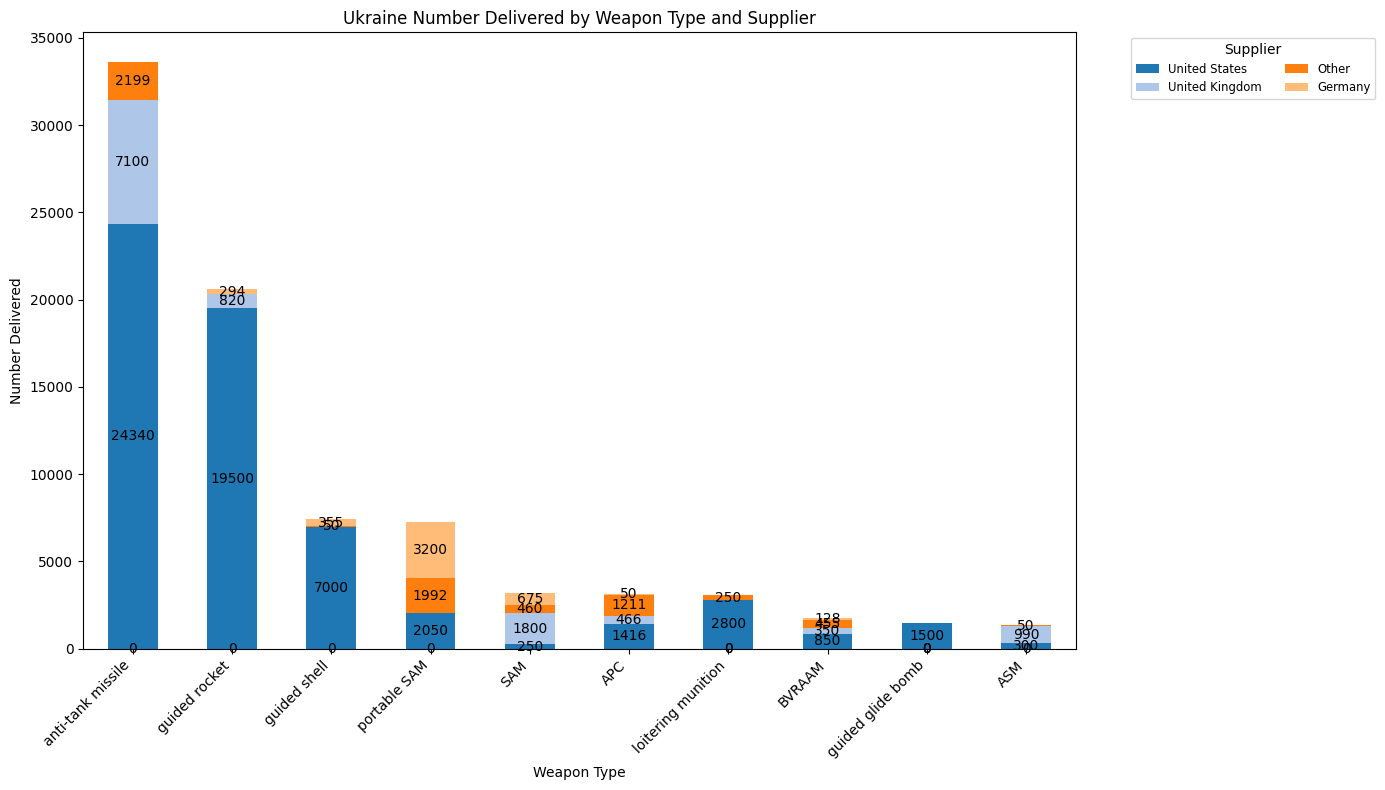

In [20]:
# Group small contributors into "Other"
threshold = 0.05 * data['Number_Delivered'].sum()  # Set a threshold for grouping
data['Supplier'] = data['Supplier'].apply(
    lambda x: x if data[data['Supplier'] == x]['Number_Delivered'].sum() > threshold else 'Other'
)

# Regroup the data
weapon_delivery = data.groupby(['Weapon_Description', 'Supplier'])['Number_Delivered'].sum().unstack(fill_value=0)

# Select top 10 weapon types by total deliveries
top_weapon_deliveries = weapon_delivery.sum(axis=1).sort_values(ascending=False).head(10)

# Filter the data for the top weapon types
filtered_weapon_delivery = weapon_delivery.loc[top_weapon_deliveries.index]

# Sort suppliers for consistent coloring
filtered_weapon_delivery = filtered_weapon_delivery.loc[:, filtered_weapon_delivery.sum(axis=0).sort_values(ascending=False).index]

# Plot with improved readability
palette = sns.color_palette("tab20", n_colors=len(filtered_weapon_delivery.columns))
ax = filtered_weapon_delivery.plot(kind='bar', stacked=True, figsize=(14, 8), color=palette)

# Add data labels
for c in filtered_weapon_delivery.columns:
    ax.bar_label(ax.containers[filtered_weapon_delivery.columns.get_loc(c)], label_type='center')

# Improve chart formatting
plt.title('Ukraine Number Delivered by Weapon Type and Supplier')
plt.xlabel('Weapon Type')
plt.ylabel('Number Delivered')
plt.legend(title='Supplier', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2, fontsize='small')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [7]:
# Group by weapon description and year to sum the number delivered across all suppliers
weapon_time_series_all = expanded_data.groupby(['Weapon_Description', 'Year_of_Delivery'])['Number_Delivered'].sum().unstack(fill_value=0)

# Transpose the data for plotting (to have years on x-axis)
weapon_time_series_all = weapon_time_series_all.T

# Plot the time series for all weapon descriptions with a color for each weapon
fig, ax = plt.subplots(figsize=(20, 12))

weapon_time_series_all.plot(
    kind='area',
    stacked=True,
    alpha=0.8,
    colormap='tab20',  # Assign unique colors to each weapon description
    ax=ax
)

# Customize the plot
plt.title('Number Delivered Over Time by Weapon Description')
plt.xlabel('Year')
plt.ylabel('Number Delivered')
plt.legend(title='Weapon Description', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

NameError: name 'expanded_data' is not defined

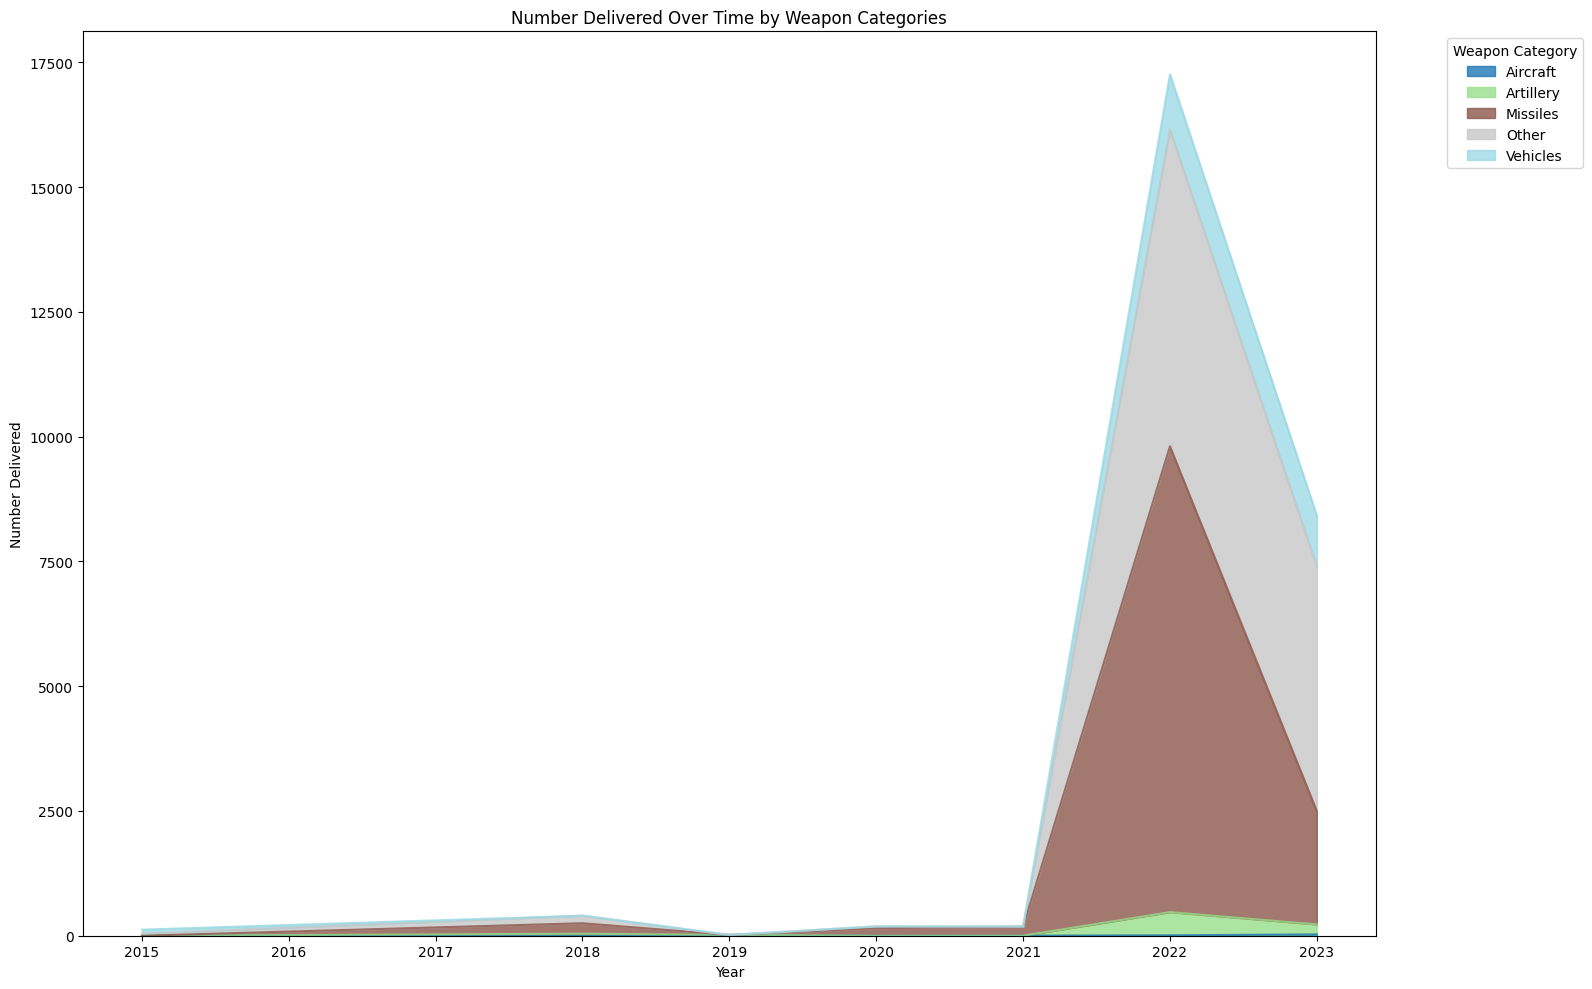

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Function to categorize weapon types
def categorize_weapons(weapon_description):
    weapon_categories = {
        'Missiles': ['SAM', 'ASM', 'anti-tank missile', 'BVRAAM', 'guided rocket'],
        'Vehicles': ['APC', 'tank', 'armored car', 'armored vehicle'],
        'Artillery': ['self-propelled gun', 'towed gun', 'self-propelled MRL'],
        'Aircraft': ['combat helicopter', 'trainer/combat aircraft', 'transport helicopter'],
        'Other': []
    }
    for category, weapons in weapon_categories.items():
        if weapon_description in weapons:
            return category
    return 'Other'

# Group and categorize weapon descriptions
expanded_data['Weapon_Category'] = expanded_data['Weapon_Description'].map(categorize_weapons)

# Aggregate by weapon categories and year
category_time_series = expanded_data.groupby(['Year_of_Delivery', 'Weapon_Category'])['Number_Delivered'].sum().unstack(fill_value=0)

# Plot grouped data with Matplotlib
fig, ax = plt.subplots(figsize=(16, 10))
category_time_series.plot(kind='area', stacked=True, alpha=0.8, colormap='tab20', ax=ax)
plt.title('Number Delivered Over Time by Weapon Categories')
plt.xlabel('Year')
plt.ylabel('Number Delivered')
plt.legend(title='Weapon Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Create an interactive plot with Plotly
plotly_data = expanded_data.groupby(['Year_of_Delivery', 'Weapon_Description'])['Number_Delivered'].sum().reset_index()

fig = px.area(
    plotly_data,
    x='Year_of_Delivery',
    y='Number_Delivered',
    color='Weapon_Description',
    title='Interactive: Number Delivered Over Time by Weapon Description',
    labels={'Year_of_Delivery': 'Year', 'Number_Delivered': 'Number Delivered'},
    template='plotly_dark'
)
fig.show()

##Russia Transfers

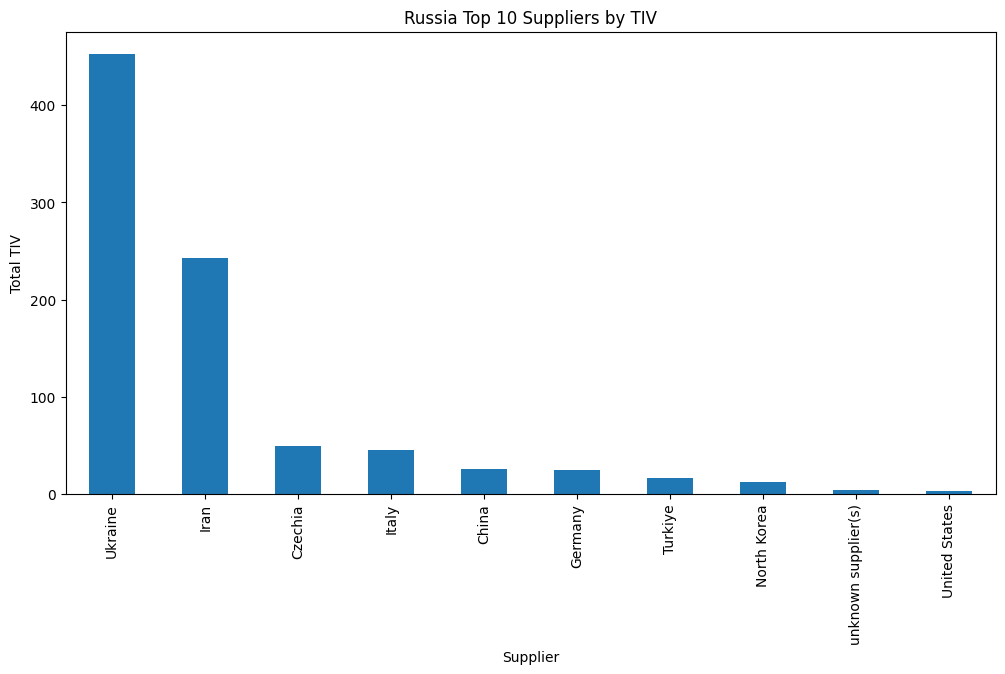

<Figure size 1400x800 with 0 Axes>

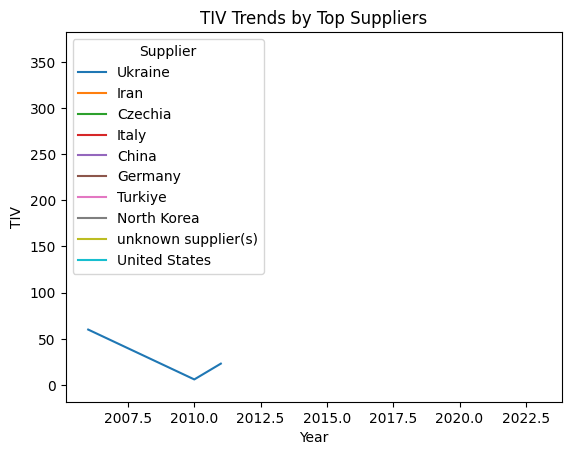

In [21]:
 import pandas as pd

# Load your data
data = pd.read_csv('/content/russia_trade.csv')
data.head()
 #Here, we use 'SIPRI TIV of delivered weapons' as TIV
data.rename(columns={'SIPRI TIV of delivered weapons': 'TIV'}, inplace=True)

# Drop rows with missing TIV or Supplier
data = data.dropna(subset=['Supplier', 'TIV'])

# Ensure TIV is numeric
data['TIV'] = pd.to_numeric(data['TIV'], errors='coerce')

# Group by supplier and sum TIV
supplier_tiv = data.groupby('Supplier')['TIV'].sum().sort_values(ascending=False)

# Select top 10 suppliers by TIV
top_suppliers = supplier_tiv.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_suppliers.plot(kind='bar', title='Russia Top 10 Suppliers by TIV')
plt.xlabel('Supplier')
plt.ylabel('Total TIV')
plt.show()

# Group by supplier and year for trend analysis
data.rename(columns={'Year of order': 'Year_of_Order'}, inplace=True)
tiv_trends = data.groupby(['Supplier', 'Year_of_Order'])['TIV'].sum().unstack()

# Plot trends for top 5 suppliers
plt.figure(figsize=(14, 8))
tiv_trends.loc[top_suppliers.index].T.plot(title='TIV Trends by Top Suppliers')
plt.xlabel('Year')
plt.ylabel('TIV')
plt.legend(title='Supplier')
plt.show()

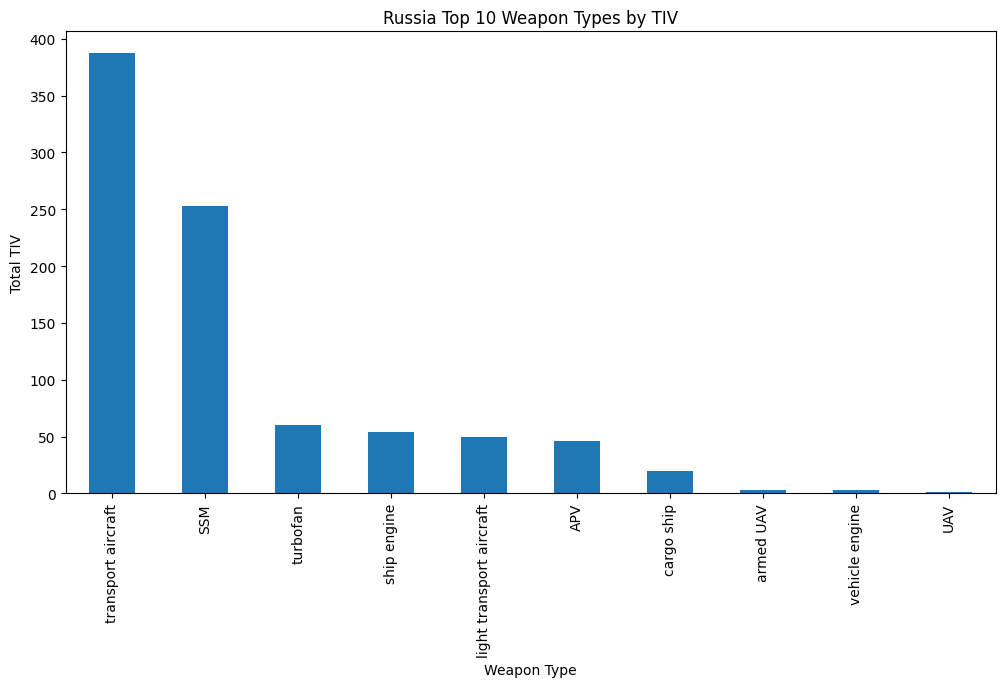

<Figure size 1400x800 with 0 Axes>

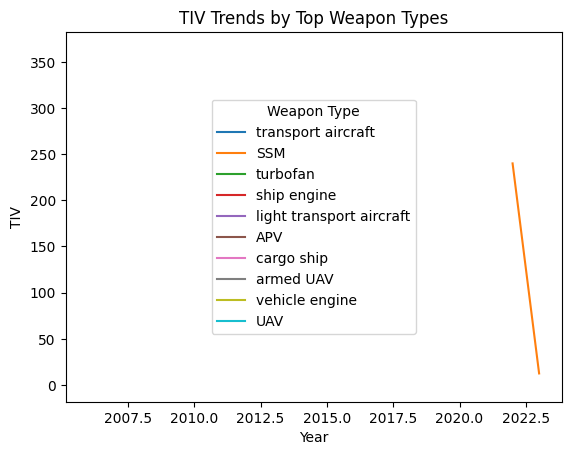

In [22]:
# Use the correct column for TIV
data.rename(columns={'SIPRI TIV of delivered weapons': 'TIV', 'Weapon description': 'Weapon_Description'}, inplace=True)

# Group by weapon type and sum TIV
weapon_type_tiv = data.groupby('Weapon_Description')['TIV'].sum().sort_values(ascending=False)

# Select top 10 weapon types by TIV
top_weapon_types = weapon_type_tiv.head(10)

# Plot the data
plt.figure(figsize=(12, 6))
top_weapon_types.plot(kind='bar', title='Russia Top 10 Weapon Types by TIV')
plt.xlabel('Weapon Type')
plt.ylabel('Total TIV')
plt.show()

# Group by weapon type and year for trend analysis
tiv_trends_by_weapon = data.groupby(['Weapon_Description', 'Year_of_Order'])['TIV'].sum().unstack()

# Plot trends for top 5 weapon types
plt.figure(figsize=(14, 8))
tiv_trends_by_weapon.loc[top_weapon_types.index].T.plot(title='TIV Trends by Top Weapon Types')
plt.xlabel('Year')
plt.ylabel('TIV')
plt.legend(title='Weapon Type')
plt.show()

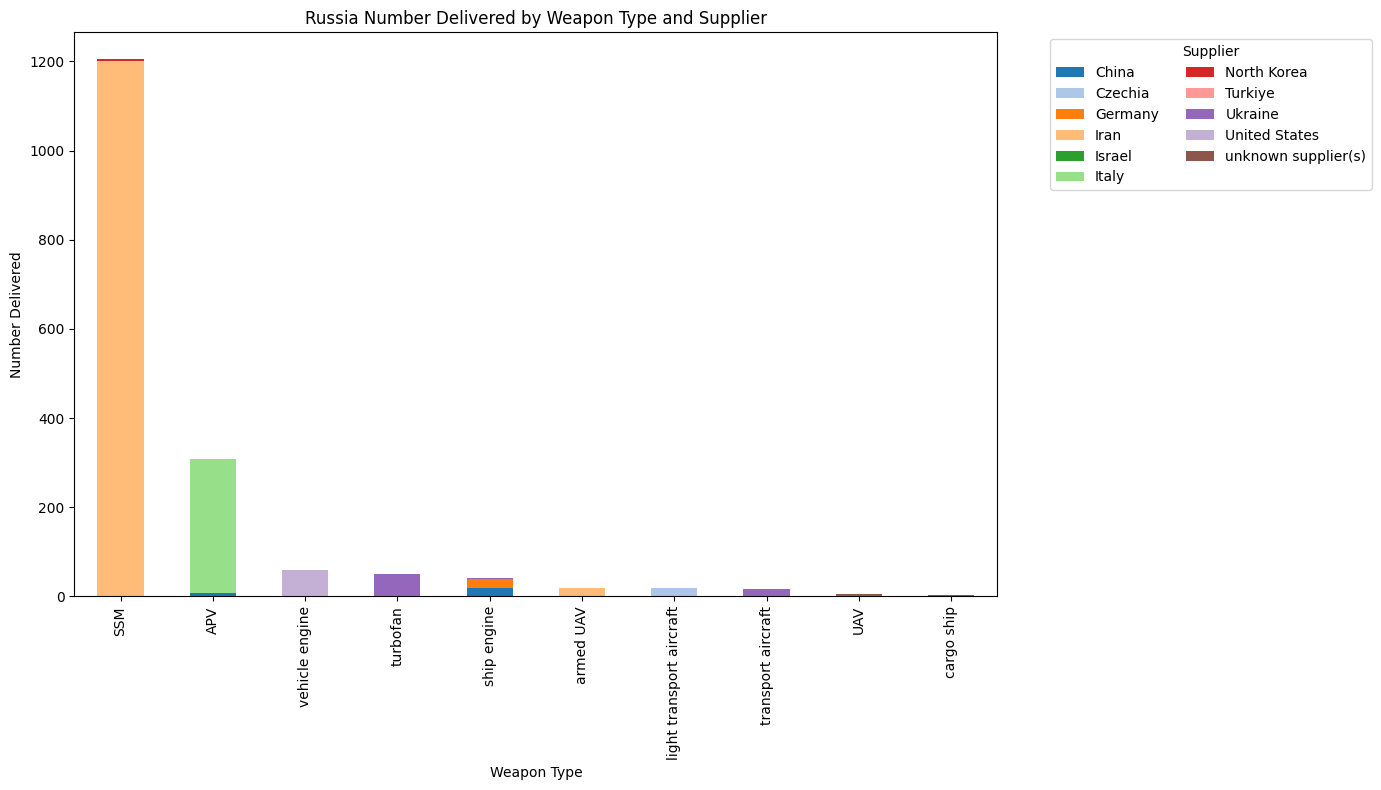

In [23]:
# Ensure column names match the dataset
data.rename(columns={'Weapon description': 'Weapon_Description', 'Number delivered': 'Number_Delivered'}, inplace=True)

# Group by weapon description and supplier to sum the number delivered
weapon_delivery = data.groupby(['Weapon_Description', 'Supplier'])['Number_Delivered'].sum().unstack(fill_value=0)

# Select top 10 weapon types by total number delivered
top_weapon_deliveries = weapon_delivery.sum(axis=1).sort_values(ascending=False).head(10)

# Filter the data for the top weapon types
filtered_weapon_delivery = weapon_delivery.loc[top_weapon_deliveries.index]

import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger, diverse color palette
palette = sns.color_palette("tab20", n_colors=len(filtered_weapon_delivery.columns))

# Plot the data as a stacked bar chart with unique colors
filtered_weapon_delivery.plot(kind='bar', stacked=True, figsize=(14, 8), color=palette)
plt.title('Russia Number Delivered by Weapon Type and Supplier')
plt.xlabel('Weapon Type')
plt.ylabel('Number Delivered')
plt.legend(title='Supplier', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()

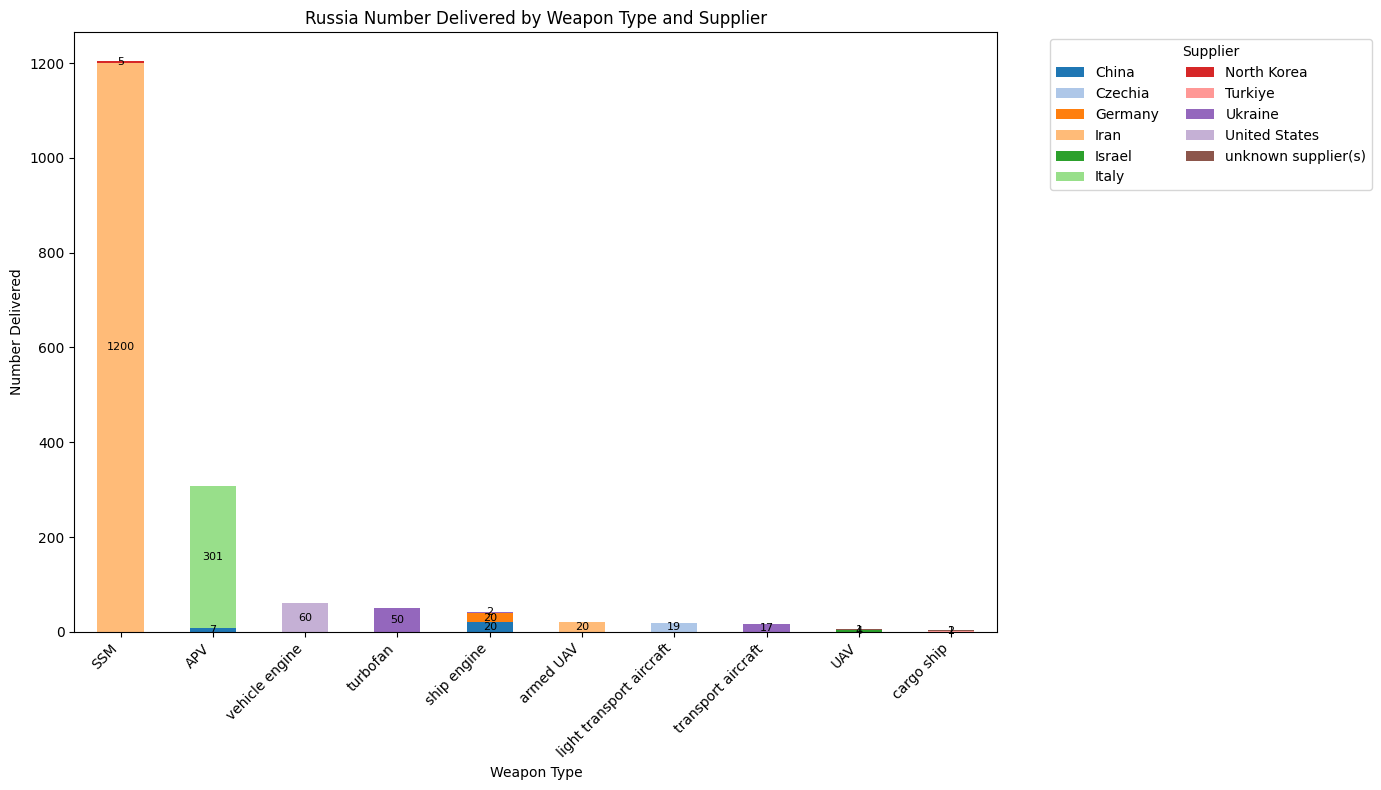

In [25]:
# Ensure column names match the dataset
data.rename(columns={'Weapon description': 'Weapon_Description', 'Number delivered': 'Number_Delivered'}, inplace=True)

# Group by weapon description and supplier to sum the number delivered
weapon_delivery = data.groupby(['Weapon_Description', 'Supplier'])['Number_Delivered'].sum().unstack(fill_value=0)

# Select top 10 weapon types by total number delivered
top_weapon_deliveries = weapon_delivery.sum(axis=1).sort_values(ascending=False).head(10)

# Filter the data for the top weapon types
filtered_weapon_delivery = weapon_delivery.loc[top_weapon_deliveries.index]

import matplotlib.pyplot as plt
import seaborn as sns

# Create a larger, diverse color palette
palette = sns.color_palette("tab20", n_colors=len(filtered_weapon_delivery.columns))

# Plot the data as a stacked bar chart with unique colors
ax = filtered_weapon_delivery.plot(kind='bar', stacked=True, figsize=(14, 8), color=palette)

# Add data labels to each bar segment, but skip zero values
for container in ax.containers:
    # Add labels only if the value is greater than zero
    labels = [f'{int(value)}' if value > 0 else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=8, color='black')

# Enhance the visualization
plt.title('Russia Number Delivered by Weapon Type and Supplier')
plt.xlabel('Weapon Type')
plt.ylabel('Number Delivered')
plt.legend(title='Supplier', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

# Fox News Articles scraper


```
# This is formatted as code
```





In [ ]:
url = 'https://www.foxnews.com/category/world/conflicts/ukraine'
next_button = '//*[@id="wrapper"]/div[2]/div[3]/div/main/section/footer/div'

import requests
endpoint = 'https://www.foxnews.com/category/world/conflicts/ukraine'

result=requests.get(endpoint)
result.raise_for_status

import lxml
from bs4 import BeautifulSoup

html = BeautifulSoup(result.text,'lxml')
#print(html.prettify())

from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

from selenium.webdriver.chrome.options import Options
chrome_options = Options()
chrome_options.add_argument("--headless")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options = chrome_options)

from selenium.common.exceptions import TimeoutException
driver.set_page_load_timeout(10) # twenty seconds should be enough

try:
    driver.get(url)
except TimeoutException:
    driver.execute_script("window.stop();")

import time
#while True:
#for i in range(0,1000):
counter = 1
while counter <= 3000:
    try:
        time.sleep(2)
        button=driver.find_element("xpath", '//*[@id="wrapper"]/div[2]/div[3]/div/main/section/footer/div')
        button.click()
        counter += 1
        print(counter)
    except:
        break

import lxml.html as lx
from lxml import etree

html_content = driver.page_source

soup = BeautifulSoup(html_content, 'lxml')

titles_list = []
titles = soup.find_all('h4', class_='title')  # Modify based on actual tag and class
for title in titles:
    titles_list.append(title.text.strip())

len(titles_list)

times_list = []
times = soup.find_all('span', class_='time')  # Modify based on actual tag and class
for time in times:
    times_list.append(time.text.strip())

times_list.pop(0)
#times_list
len(times_list)

titles = soup.find_all("h4", class_="title")

urls = []
for title in titles:
    link = title.find("a")
    if link and 'href' in link.attrs:
        # Append the base URL if needed (replace 'https://www.foxnews.com' with the actual site if necessary)
        urls.append("https://www.foxnews.com" + link['href'])

print(urls)
#len(urls)


from datetime import datetime, timedelta
from dateutil import parser
import re

now = datetime.now()

def parse_date(entry):
    try:
        # Parse absolute dates (like "June 13, 2023")
        return parser.parse(entry).date()
    except (ValueError, OverflowError):
        # Handle relative times (like "12 hours ago")
        match = re.match(r"(\d+)\s+(hour|day|minute|second)s?\s+ago", entry)
        if match:
            quantity, unit = int(match.group(1)), match.group(2)
            if unit == "day":
                return (now - timedelta(days=quantity)).date()
            elif unit == "hour":
                return (now - timedelta(hours=quantity)).date()
            elif unit == "minute":
                return (now - timedelta(minutes=quantity)).date()
            elif unit == "second":
                return (now - timedelta(seconds=quantity)).date()
        else:
            raise ValueError(f"Unrecognized date format: {entry}")

# Convert each entry in the list
standardized_dates = [parse_date(entry) for entry in times_list]
print(standardized_dates)


format_dates = []
for date in standardized_dates:
    formatted_date = date.strftime("%Y, %m, %d")
    format_dates.append(formatted_date)

import pandas as pd
df = pd.DataFrame({
    "Title": titles_list,
    "Date": format_dates,
    "URL": urls
})

df = df[~df['URL'].str.contains('/video/')]

import requests
from bs4 import BeautifulSoup

# Define a function to scrape the article text
def scrape_article_text(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the main content of the article - this may vary, so adjust as needed
        paragraphs = soup.find_all('div', class_='article-body')  # this example collects all <p> tags

        # Combine paragraph text
        article_text = ' '.join([p.get_text() for p in paragraphs])
        return article_text
    except Exception as e:
        print(f"Error scraping {url}: {e}")
        return None


texts_list = []
for link in df['URL']:
    text = scrape_article_text(link)
    texts_list.append(text)

df['Text'] = texts_list

df['Text'] = df['Text'].str.slice(start=18)


file_path = r"C:\Users\pminh\OneDrive\Desktop\Classes\Fall 24\STA 141B\Data\fox_articles.csv"
df.to_csv(file_path, index=False)


In [ ]:
import sqlite3

# Step 1: Connect to SQLite database (it will create a new database file if it doesn’t exist)
conn = sqlite3.connect('foxnews_ukraine.db')
cursor = conn.cursor()

# Step 2: Create a table for storing the data
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Articles (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        Title TEXT,
        Date TEXT
    )
''')

# Step 3: Insert data into the table
for _, row in df.iterrows():
    cursor.execute('''
        INSERT INTO Articles (Title, Date) VALUES (?, ?)
    ''', (row['Title'], row['Date']))

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Data has been stored in the SQLite database.")

# CNN Article Scraper

In [ ]:
import random
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
import time

# Initialize Chrome driver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# Initialize separate lists for headlines and links
headlines = []
links = []

# Pagination loop
page = 1
max_pages = 202  # Set how many pages you want to scrape

while page <= max_pages:
    # Construct URL for current page
    current_url = f'https://edition.cnn.com/search?q=ukraine&types=article&size=10&from={(page-1)*10}&page={page}'
    driver.get(current_url)

    # Wait for the page to load and articles to appear
    wait = WebDriverWait(driver, 10)
    articles = wait.until(EC.presence_of_all_elements_located((By.CLASS_NAME, "container__headline-text")))

    # Extract article links and headlines
    for article in articles:
        try:
            headline = article.text
            link = article.get_attribute('data-zjs-href')
            if link:
                headlines.append(headline)
                links.append(link)
        except Exception as e:
            print(f"Error extracting article on page {page}: {e}")

    print(f"Completed scraping page {page}")
    time.sleep(random.randint(1,3))
    page += 1

driver.quit()
cnn_link.append(links[0])
cnn_headline.append(headlines[0])
import pandas as pd
cnn_data = pd.DataFrame({'Headlines': cnn_headline, 'Link': cnn_link})
cnn_data.head(10)
cnn_data.to_csv('CNN_Data.csv', index=False)
from bs4 import BeautifulSoup
import requests

def date_and_text(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    timestamp_div = soup.find('div', class_='timestamp')
    date_text = timestamp_div.get_text(strip=True) if timestamp_div else "Date not found"
    cleaned_date = date_text.split(',', 1)[-1].strip()

    article_paragraphs = soup.find_all('div', class_='zn-body__paragraph') or soup.find_all('p')
    article_text = " ".join([para.get_text(strip=True) for para in article_paragraphs])

    if article_text.startswith("Follow:"):
        article_text = article_text[len("Follow:"):].strip()

    copyright_pos = article_text.find("©")
    if copyright_pos != -1:
        cleaned_article_text = article_text[:copyright_pos].strip()
    else:
        cleaned_article_text = article_text.strip()

    return cleaned_date, cleaned_article_text

temp_dates = []
temp_texts = []

for i in range(len(cnn_link)):
    date, text = date_and_text(cnn_link[i])
    temp_dates.append(date)
    temp_texts.append(text)
    print(f"Completed article {i + 1400}")
    time.sleep(1)
article_dates = []
article_texts = []
article_dates.extend(temp_dates)
article_texts.extend(temp_texts)
cnn_data["Date"] = article_dates
cnn_data["Article Text"] = article_texts
cnn_data.to_csv('CNN_Data.csv', index=False)

##topic analyzer

In [ ]:
!pip install nltk punkt

ERROR: Could not find a version that satisfies the requirement punkt (from versions: none)
ERROR: No matching distribution found for punkt


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import spacy
import re

# Load spaCy's English model for lemmatization
nlp = spacy.load("en_core_web_sm")

# Load datasets
cnn_data = pd.read_csv('/content/CNN_Data.csv', encoding='ISO-8859-1')
fox_data = pd.read_csv('/content/fox_articles.csv', encoding='ISO-8859-1')

# Combine datasets
cnn_articles = cnn_data['Article Text']
fox_articles = fox_data['Text']
articles = pd.concat([cnn_articles, fox_articles], ignore_index=True)

# Filter for Ukraine-related articles
keywords = ['ukraine', 'russia', 'war', 'artillery', 'drones', 'strike', 'invasion', 'missile', 'nato', 'donetsk', 'luhansk']
ukraine_articles = articles.dropna().apply(
    lambda x: x if any(kw in x.lower() for kw in keywords) else None
).dropna()

# Custom stopwords
custom_stopwords = ['said', 'news', 'cnn', 'fox', 'according', 'president', 'russian', 'also', 'would', 'ukrainian']

# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text.lower())  # Remove non-alphabetic characters
    doc = nlp(text)
    lemmatized = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in custom_stopwords and len(token.text) > 2
    ]
    return ' '.join(lemmatized)

# Preprocess articles
preprocessed_articles = ukraine_articles.apply(preprocess_text)

# Vectorize with TF-IDF
vectorizer = TfidfVectorizer(max_df=0.85, min_df=5, max_features=5000)
dtm = vectorizer.fit_transform(preprocessed_articles)

# Train LDA
lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(dtm)

# Display topics
def display_topics(model, feature_names, num_words):
    for topic_idx, topic in enumerate(model.components_):
        words = [feature_names[i] for i in topic.argsort()[:-num_words - 1:-1]]
        print(f"Topic {topic_idx + 1}: {' '.join(words)}")

display_topics(lda, vectorizer.get_feature_names_out(), 10)

<ipython-input-14-95d5328dfe10>:11: DtypeWarning: Columns (147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,3

Topic 1: severodonetsk regain ground kerry rsc copyright thenvice impeachment roy andor
Topic 2: they war his will putin military but force defense attack
Topic 3: moldova moldovas serbia moldovan sandu transnistria kosovo chisinau serbian maia
Topic 4: house aid johnson senate republican biden funding bill billion republicans
Topic 5: athlete olympic sport azerbaijan ioc compete armenia armenian tennis paris
Topic 6: korean north korea kim hall pyongyang musk jong koreas francis


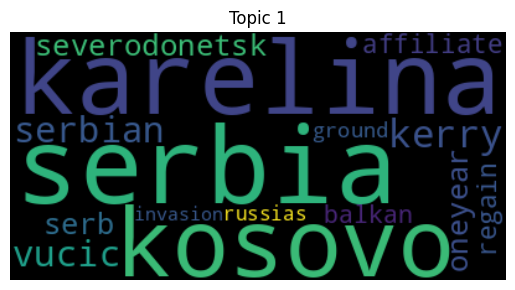

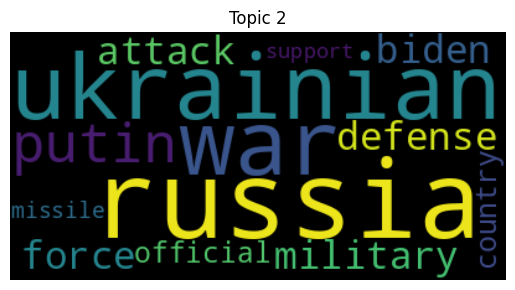

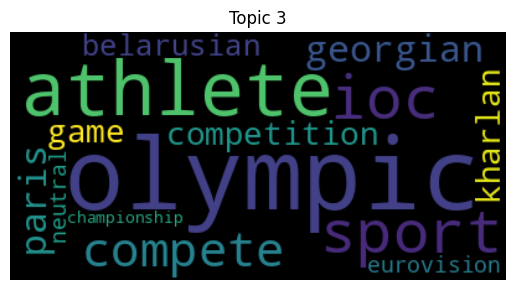

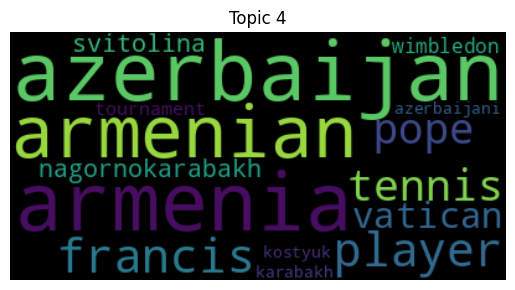

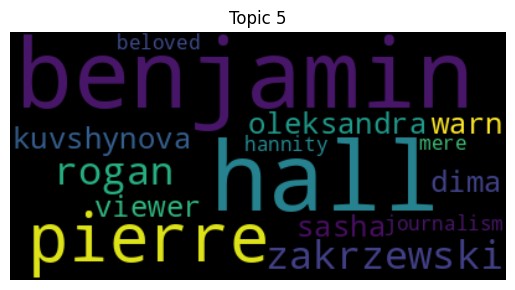

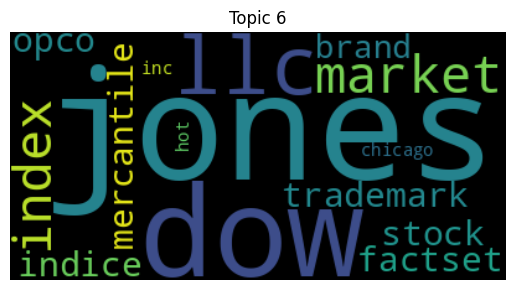

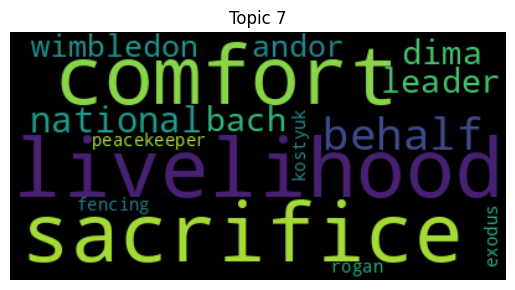

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for idx, topic in enumerate(lda.components_):
    wc = WordCloud().generate(' '.join([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-15 - 1:-1]]))
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {idx + 1}")
    plt.show()

<ipython-input-16-c38158140d74>:7: DtypeWarning: Columns (147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,38

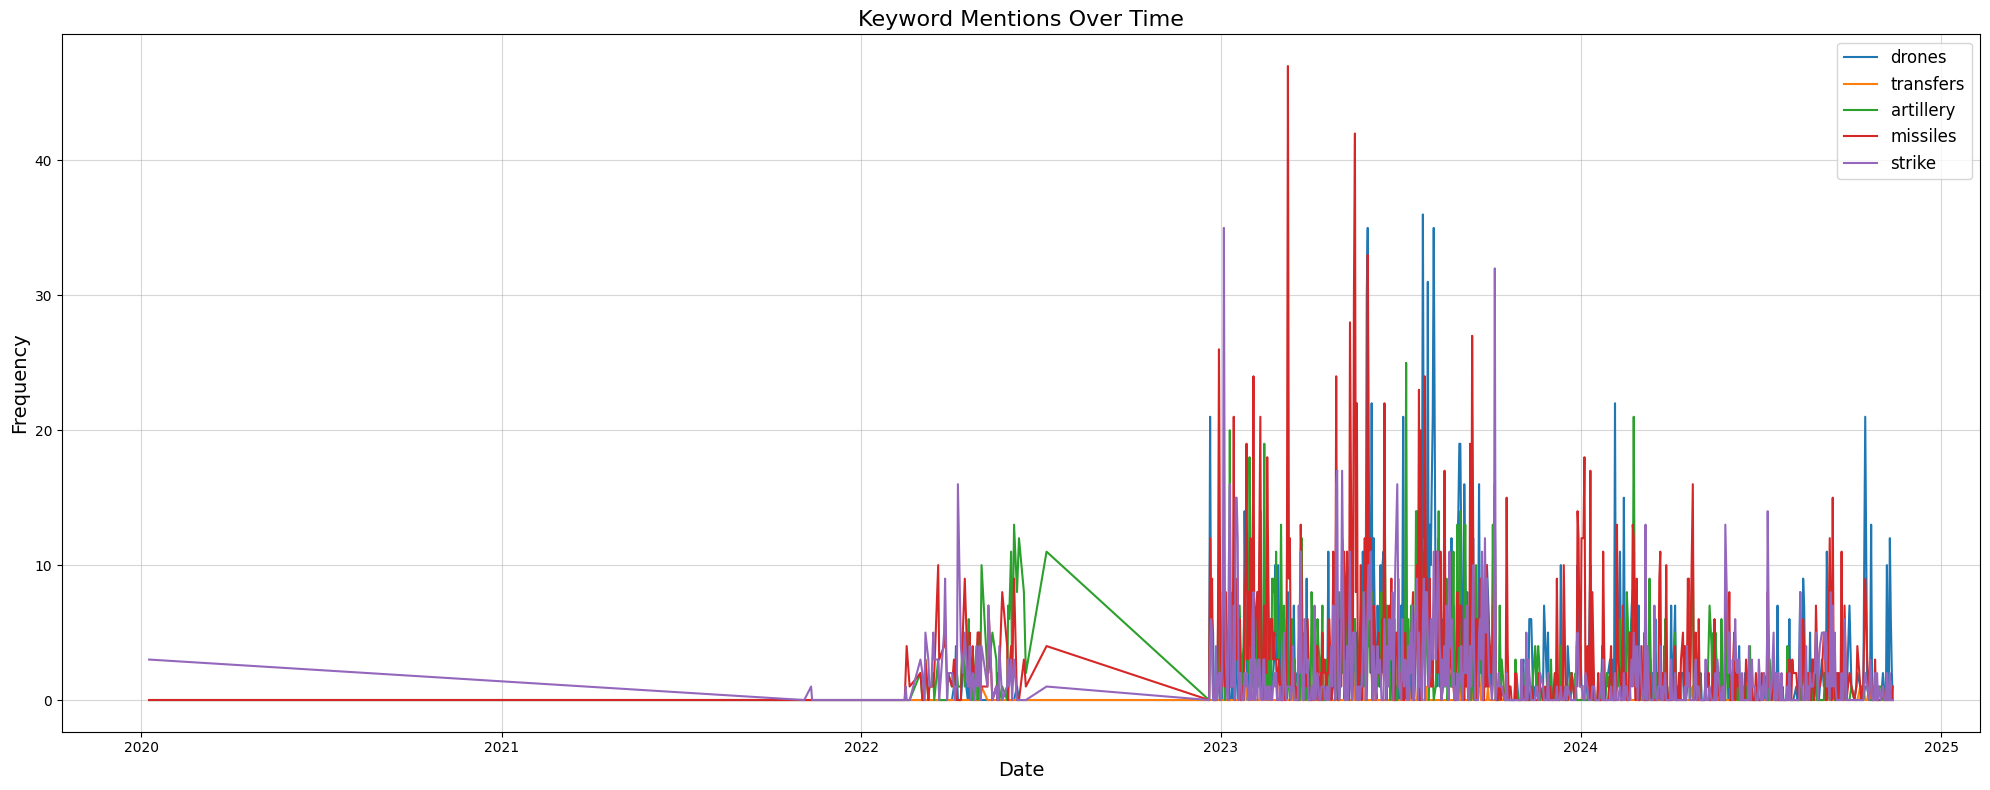

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load datasets
cnn_data = pd.read_csv('/content/CNN_Data.csv', encoding='ISO-8859-1')
fox_data = pd.read_csv('/content/fox_articles.csv', encoding='ISO-8859-1')

# Combine datasets
cnn_articles = cnn_data[['Article Text', 'Date']]
fox_articles = fox_data[['Text', 'Date']]
cnn_articles.columns = ['text', 'date']
fox_articles.columns = ['text', 'date']
articles = pd.concat([cnn_articles, fox_articles], ignore_index=True)

# Define keywords
keywords = ['drones', 'transfers', 'artillery', 'missiles', 'strike']

# Preprocess text (lowercase and clean)
def preprocess_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', str(text).lower())

articles['text'] = articles['text'].apply(preprocess_text)

# Count keyword occurrences by date
def count_keywords(row, keywords):
    counts = Counter(row['text'].split())
    return {kw: counts.get(kw, 0) for kw in keywords}

# Apply keyword counting and create a DataFrame
articles['keyword_counts'] = articles.apply(lambda row: count_keywords(row, keywords), axis=1)
keyword_df = pd.DataFrame(list(articles['keyword_counts'])).fillna(0)

# Add the date column
keyword_df['date'] = pd.to_datetime(articles['date'], errors='coerce')

# Group by date and sum counts
time_series_data = keyword_df.groupby('date')[keywords].sum().reset_index()

# Plot time series with a wider plot
plt.figure(figsize=(20, 8))  # Adjusted to make it wider
for kw in keywords:
    plt.plot(time_series_data['date'], time_series_data[kw], label=kw)

plt.xlabel('Date', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Keyword Mentions Over Time', fontsize=16)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

<ipython-input-4-cccfabe354ad>:7: DtypeWarning: Columns (147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382

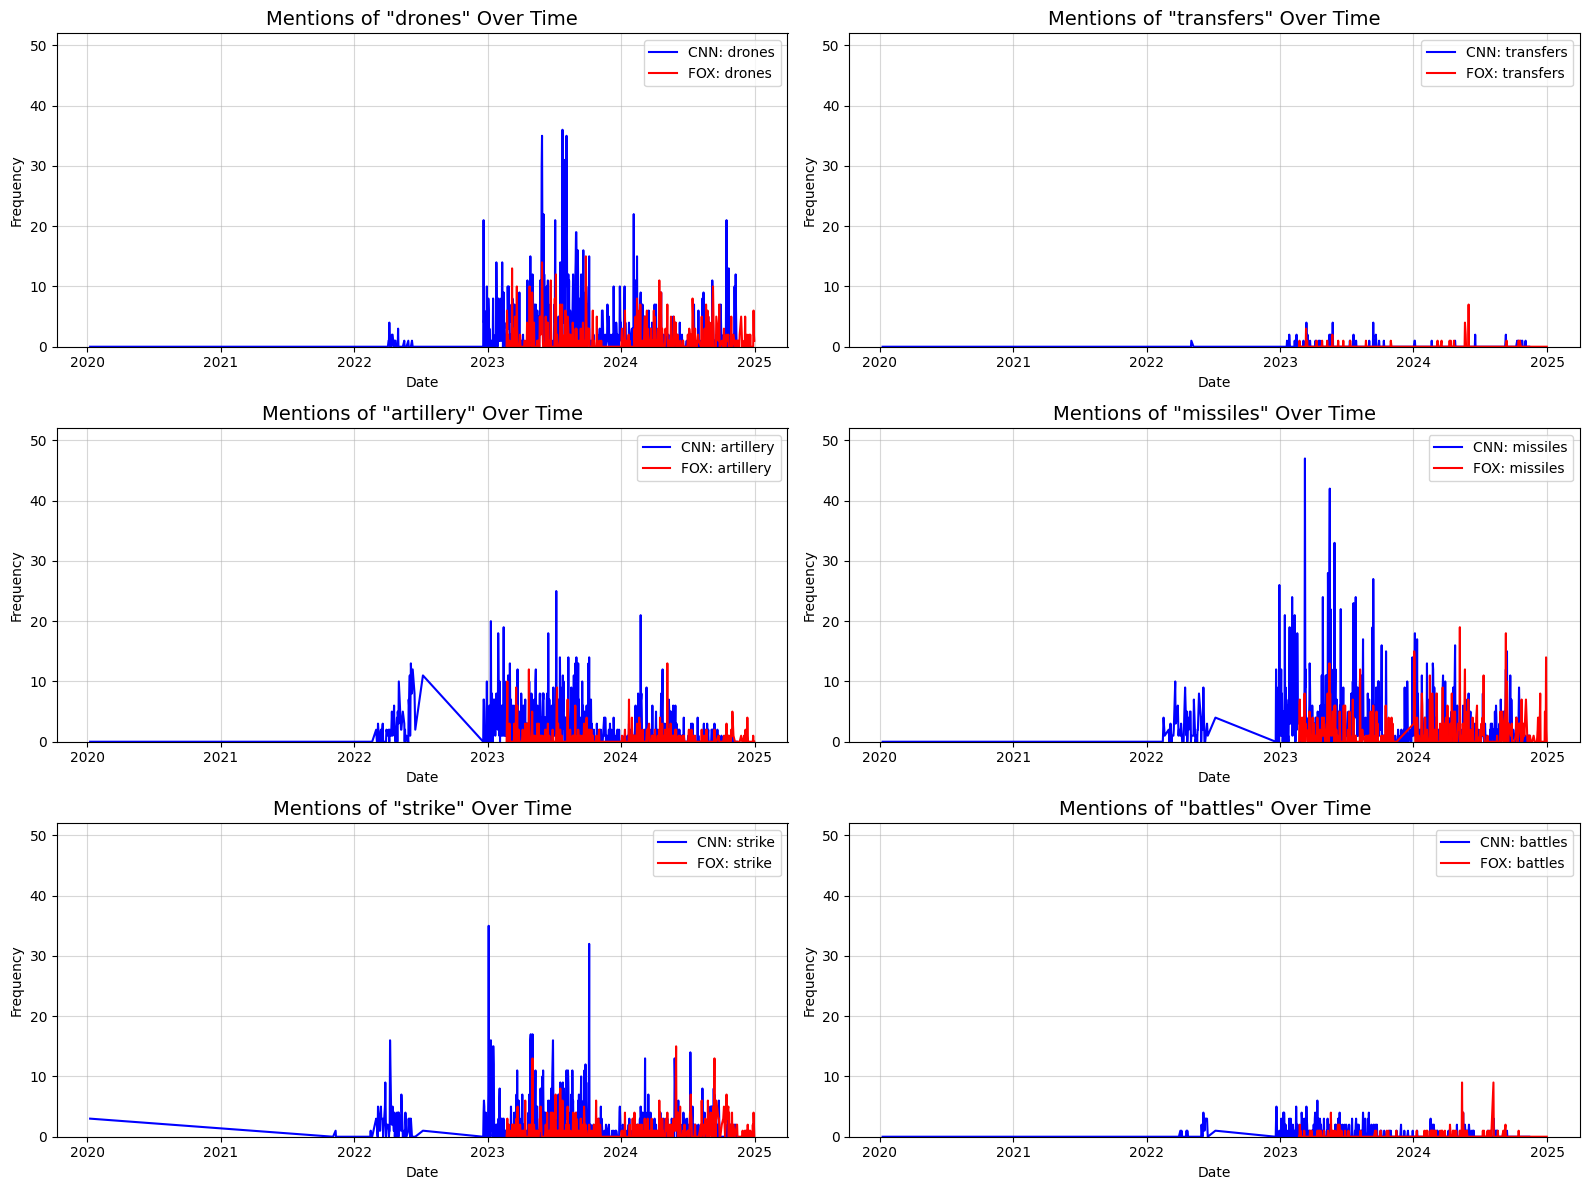

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# Load datasets
cnn_data = pd.read_csv('/content/CNN_Data.csv', encoding='ISO-8859-1')
fox_data = pd.read_csv('/content/fox_articles.csv', encoding='ISO-8859-1')

# Process CNN and FOX data separately
cnn_articles = cnn_data[['Article Text', 'Date']]
fox_articles = fox_data[['Text', 'Date']]
cnn_articles.columns = ['text', 'date']
fox_articles.columns = ['text', 'date']

# Define keywords
keywords = ['drones', 'transfers', 'artillery', 'missiles', 'strike', 'battles']

# Preprocess text (lowercase and clean)
def preprocess_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', str(text).lower())

cnn_articles['text'] = cnn_articles['text'].apply(preprocess_text)
fox_articles['text'] = fox_articles['text'].apply(preprocess_text)

# Count keyword occurrences by date
def count_keywords(row, keywords):
    counts = Counter(row['text'].split())
    return {kw: counts.get(kw, 0) for kw in keywords}

cnn_articles['keyword_counts'] = cnn_articles.apply(lambda row: count_keywords(row, keywords), axis=1)
fox_articles['keyword_counts'] = fox_articles.apply(lambda row: count_keywords(row, keywords), axis=1)

# Create keyword DataFrames for CNN and FOX
cnn_keyword_df = pd.DataFrame(list(cnn_articles['keyword_counts'])).fillna(0)
fox_keyword_df = pd.DataFrame(list(fox_articles['keyword_counts'])).fillna(0)

# Add the date column
cnn_keyword_df['date'] = pd.to_datetime(cnn_articles['date'], errors='coerce')
fox_keyword_df['date'] = pd.to_datetime(fox_articles['date'], errors='coerce')

# Group by date and sum counts
cnn_time_series = cnn_keyword_df.groupby('date')[keywords].sum().reset_index()
fox_time_series = fox_keyword_df.groupby('date')[keywords].sum().reset_index()

# Determine the global maximum value for the y-axis
max_value = max(
    cnn_time_series[keywords].max().max(),
    fox_time_series[keywords].max().max()
)

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to easily iterate over subplots

for i, kw in enumerate(keywords):
    ax = axes[i]

    # Plot CNN data
    ax.plot(cnn_time_series['date'], cnn_time_series[kw], label=f'CNN: {kw}', color='blue')

    # Plot FOX data
    ax.plot(fox_time_series['date'], fox_time_series[kw], label=f'FOX: {kw}', color='red')

    # Set labels, title, and legend
    ax.set_title(f'Mentions of "{kw}" Over Time', fontsize=14)
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.legend(fontsize=10)
    ax.grid(alpha=0.5)

    # Set consistent y-axis limits
    ax.set_ylim(0, max_value + 5)

# Adjust layout
plt.tight_layout()
plt.show()